In [3]:
import sys
sys.path.append('/cluster/sj1/bb_opt/scripts')

In [4]:
%load_ext autoreload
%autoreload 2

import torch
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collect_stats as cs

%matplotlib inline

In [5]:
import collect_stats as cs

In [60]:
exp_folder = '/cluster/sj1/bb_opt/experiments'
test_filepath = '/cluster/sj1/bb_opt/data/tatsu_pbm/test_files'
filedir = '/cluster/sj1/bb_opt/data/paper_data2'
num_tfs_to_test = 38
batches = [10, 20, 100, 200]
batches = [20]
num_acks = 15

In [7]:
with open(test_filepath, 'r') as f:
    filenames = [k.strip() for k in f.readlines()][:num_tfs_to_test]

In [8]:
def sigmoid(x, exp=np.exp):
  return 1.0 / (1.0 + exp(-x))

In [9]:
filenames = ['malaria']

In [10]:
filenames = [
    'HESX1_E149K_R1_8mers.txt',
    'EGR2_D383Y_R1_8mers.txt',
    'BCL6_H676Y_R1_8mers.txt',
    'ARX_L343Q_R1_8mers.txt',
    'CRX_E80A_R1_8mers.txt',
    'ESX1_K193R_R1_8mers.txt',
    'FOXC1_F112S_R1_8mers.txt',
    'GFI1B_A204T_R1_8mers.txt',
    'GFI1_L400F_R1_8mers.txt',
    'HOXC4_N178S_R1_8mers.txt',
    'HOXD13_I322L_R1_8mers.txt',
    'ISX_R83Q_R1_8mers.txt',
    'KLF11_R402Q_R1_8mers.txt',
    'KLF1_E325K_R1_8mers.txt',
    'MSX2_P148H_R1_8mers.txt',
    'NKX2-5_K183E_R1_8mers.txt',
    'NR1H4_C144R_R1_8mers.txt',
    'NR2E3_G56R_R1_8mers.txt',
    'OVOL2_D228E_R1_8mers.txt',
    'PAX3_G48R_R1_8mers.txt',
    'PAX4_R183C_R1_8mers.txt',
    'PAX6_A79E_R1_8mers.txt',
    'PAX7_P112L_R1_8mers.txt',
    'PBX4_R215Q_R1_8mers.txt',
    'PHOX2B_Q143R_R1_8mers.txt',
    'PITX2_L100Q_R1_8mers.txt',
    'POU3F4_A237G_R1_8mers.txt',
    'POU4F3_K277R_R1_8mers.txt',
    'POU6F2_E639K_R1_8mers.txt',
    'PROP1_R112Q_R1_8mers.txt',
    'SIX6_H141N_R1_8mers.txt',
    'SNAI2_D119E_R1_8mers.txt',
    'VAX2_L139M_R1_8mers.txt',
    'VENTX_E101K_R1_8mers.txt',
    'VSX1_G160D_R1_8mers.txt',
    'WT1_F392L_R1_8mers.txt',
    'ZNF200_H322Y_R1_8mers.txt',
    'ZNF655_E327G_R1_8mers.txt',
]

In [11]:
tf_max = {}
tf_labels = {}
for tf in filenames:
    labels = np.load(filedir + "/" + tf + "/labels.npy")
    labels = np.log(labels)
    tf_max[tf] = float(labels.max())
    tf_labels[tf] = labels

In [12]:
arrs = {}

In [ ]:
arrs['ensemble7/o_none_ucb_dataseed_modelseed_'][1] = 'DeepEns'
arrs['ensemble7/o_none_ucb_invar_g000510204080_dataseed_modelseed_'][1] = 'MTD'
arrs['ensemble7/o_none_ucb_maxvar_g000510204080_dataseed_modelseed_'][1] = 'MOD'
arrs['ensemble7/o_none_ucb_maxvar_inverse_g000510204080_'][1] = 'MOD-R'

In [91]:
to_read = {
    #'ensemble7/o_none_ucb_modelseed_': [None, 'e7'],
    #'ensemble7/o_none_ucb_ucb_step_0.1_modelseed_': [None, 'e7_ucb_step_0.1'],
    #'ensemble7/o_none_ucb_maxvar_g000510204080_modelseed_': [None, 'e7_maxvar_g80'],
    #'ensemble7/o_none_ucb_maxinoutvar_g000510204080_modelseed_': [None, 'e7_inoutvar_g80'],
    #'ensemble7/o_none_ucb_maxinvar_g000510204080_modelseed_': [None, 'e7_invar_g80'],
    #'ensemble7/o_none_ucb_dataseed_modelseed_': [None, 'e7'],
    #'ensemble7/o_none_ucb_invar_g000510204080_dataseed_modelseed_' : [None, 'e7_datarand_invar_g80'],
    #'ensemble7/o_none_ucb_maxvar_g000510204080_dataseed_modelseed_' : [None, 'e7_maxvar_g80'],
    #'ensemble7/o_none_ucb_inoutvar_g000510204080_dataseed_modelseed_': [None, 'e7_datarand_inoutvar_g80'],
    #'ensemble7/o_none_ucb_maxvar_inverse_g000510204080_': [None, 'MODD'],
    #'ensemble9/o_none_ucb_modelseed_': [None, 'e9'],
    #'ensemble9/o_none_ucb_maxvar_g000510204080_modelseed_': [None, 'e9_maxvar_g80'],
    #'ensemble9/o_none_ucb_maxinvar_g000510204080_modelseed_': [None, 'e9_invar_g80'],
    #'ensemble9/o_none_ucb_maxinoutvar_g000510204080_modelseed_': [None, 'e9_inoutvar_g80'],
    #'ensemble7/o_kriging_believer_kb_modelseed_': [None, 'e7_kb'],
    #'ensemble7/o_empirical_kb_div_3_modelseed_': [None, 'e7_empirical_kb'],
    #'ensemble7/o_empirical_kb_ucb_weighted_div_10_modelseed_': [None, 'e7_wekb_div10'],
    #'ensemble7/o_empirical_kb_ucb_weighted_0.5_div_10_modelseed_': [None, 'e7_wekb_0.5_div10'],
    #'ensemble7/o_empirical_kb_ucb_weighted_mean_0.5_div_10_modelseed_': [None, 'e7_wekb_mean_0.5_div10'],
    #'ensemble7/o_kb_dataseed_modelseed_': [None, 'e7_datarand_kb'],
    #'ensemble10/o_kb_dataseed_modelseed_': [None, 'e10_datarand_kb'],
    #'ensemble10/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_': [None, 'e10_datarand_wekb_div10'],
    #'ensemble11/o_kb_dataseed_modelseed_': [None, 'e11_datarand_kb'],
    #'ensemble11/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_': [None, 'e11_datarand_wekb_div10'],
    #'ensemble11/o_kb_malaria_dataseed_modelseed_': [None, 'mal_datarand_kb'],
    #'ensemble11/o_empirical_kb_malaria_ucb_weighted_0.5_div_10_dataseed_modelseed_': [None, 'mal_datarand_wekb_div10'],
    #'ensemble11/o_kb_nolog_malaria_dataseed_modelseed_': [None, 'mal_datarand_kb_nolog'],
    #'ensemble12/o_none_ucb_': [None, 'e7_2'],
    #'ensemble12/o_none_ucb_maxinvar_g000510204080_': [None, 'maxinvar2'],
    #'ensemble12/o_none_ucb_maxvar_g000510204080_': [None, 'maxvar2'],
    #'ensemble12/o_none_ucb_maxvar_id_g000510204080_': [None, 'modr2'],
    #'ensemble13/o_info_mves_div_5_minhsic_1_': [None, 'mves_div_5_minhsic_1'],
    #'ensemble13/o_info_mves_div_5_minhsic_0.05_bs_0_': [None, 'mves_bs_0'],
    #'ensemble13/o_none_ucb_': [None, 'e13'],
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.05_bs_0_': [None, 'mves_bs_0_it20'],
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.05_bs_0_fill_pdts_': [None, 'mves_bs_0_it20_fp'],
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.0_bs_0_fill_pdts_': [None, 'mves_bs_0_it20_fp_mh_0'],
    #'ensemble13_init_train_20/o_none_ucb_': [None, 'e13_it20'],
    'ensemble13_init_train_20/o_ei_ucb_': [None, 'ei_it20'],
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.05_bs_0.9_': [None, 'mves_bs_0.9_it20'],
    #'ensemble13_init_train_20/o_pdts_ucb_': [None, 'pdts_it20'],
    #'ensemble13_init_train_20/o_info_mves_div_1_minhsic_0.05_bs_0_fill_pdts_': [None, 'mves_div_1_bs_0_it20'],
    #'ensemble13_init_train_20/o_er_pdts_ucb_div_5_': [None, 'er_pdts_div_5_it20'],
    #'ensemble13_init_train_10/o_info_mves_div_5_minhsic_0.05_bs_0_fill_pdts_': [None, 'mves_bs_0_it10_fp'],
    #'ensemble13_init_train_10/o_pdts_ucb_': [None, 'pdts_it10'],
    #'ensemble13/o_pdts_ucb_': [None, 'pdts'],
    #'ensemble13/o_none_ucb_0.9_': [None, 'bs_0.9'],
    #'ensemble13/o_info_mves_div_5_minhsic_0.05_bs_0.9_': [None, 'mves_bs_0.9'],
}

In [92]:
for k in to_read:
    arrs[k] = to_read[k]
for experiment in to_read:
    print('reading', experiment)
    arrs[experiment][0] = cs.get_data(exp_folder, experiment, batches, num_samples=20, mode="bayes_opt")
    #cs.get_data(exp_folder, experiment, batches, num_samples=20, mode="bayes_opt")

reading ensemble13_init_train_20/o_ei_ucb_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10
reading sample 11
reading sample 12
reading sample 13
reading sample 14
reading sample 15
reading sample 16
reading sample 17
reading sample 18
reading sample 19
reading sample 20


In [94]:
to_eval = [
    #'ensemble7/o_none_ucb_modelseed_',
    #'ensemble7/o_none_ucb_maxvar_g000510204080_modelseed_',
    #'ensemble7/o_none_ucb_maxinvar_g000510204080_modelseed_',
    #'ensemble7/o_none_ucb_maxinoutvar_g000510204080_modelseed_',
    #'ensemble7/o_none_ucb_dataseed_modelseed_',
    #'ensemble7/o_none_ucb_invar_g000510204080_dataseed_modelseed_',
    #'ensemble7/o_none_ucb_maxvar_g000510204080_dataseed_modelseed_',
    #'ensemble7/o_none_ucb_inoutvar_g000510204080_dataseed_modelseed_',
    #'ensemble7/o_none_ucb_maxvar_inverse_g000510204080_',
    #'ensemble7/o_kriging_believer_kb_modelseed_',
    #'ensemble7/o_empirical_kb_ucb_weighted_0.5_div_10_modelseed_',
    #'ensemble7/o_empirical_kb_ucb_weighted_mean_0.5_div_10_modelseed_',
    #'ensemble7/o_kb_dataseed_modelseed_',
    #'ensemble10/o_kb_dataseed_modelseed_',
    #'ensemble10/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_',
    #'ensemble11/o_kb_dataseed_modelseed_',
    #'ensemble11/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_',
    #'ensemble11/o_kb_malaria_dataseed_modelseed_',
    #'ensemble11/o_empirical_kb_malaria_ucb_weighted_0.5_div_10_dataseed_modelseed_',
    #'ensemble12/o_none_ucb_',
    #'ensemble12/o_none_ucb_maxinvar_g000510204080_',
    #'ensemble12/o_none_ucb_maxvar_g000510204080_',
    #'ensemble12/o_none_ucb_maxvar_id_g000510204080_',
    #'ensemble13/o_none_ucb_',
    #'ensemble13/o_info_mves_div_5_minhsic_1_',
    #'ensemble13/o_info_mves_div_5_minhsic_0.05_bs_0_',
    'ensemble13_init_train_20/o_none_ucb_',
    'ensemble13_init_train_20/o_ei_ucb_',
    'ensemble13_init_train_20/o_pdts_ucb_',
    'ensemble13_init_train_20/o_er_pdts_ucb_div_5_',
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.05_bs_0_',
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.05_bs_0.9_',
    'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.05_bs_0_fill_pdts_',
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.0_bs_0_fill_pdts_',
    'ensemble13_init_train_20/o_info_mves_div_1_minhsic_0.05_bs_0_fill_pdts_',
    'ensemble13_init_train_10/o_pdts_ucb_',
    'ensemble13_init_train_10/o_info_mves_div_5_minhsic_0.05_bs_0_fill_pdts_',
    #'ensemble13/o_info_mves_div_5_minhsic_0.05_bs_0.9_',
    #'ensemble13/o_info_mves_div_5_minhsic_0.05_bs_0.95_',
    #'ensemble13/o_none_ucb_0.9_',
    #'ensemble13/o_pdts_ucb_',
]

In [19]:
idx_data_extractor = lambda x, filename : x['idx_frac'][0].item()

In [20]:
ack_rel_opt_val_data_extractor = lambda x, filename : x['ack_rel_opt_value']

In [21]:
train_rmse_fn = lambda x, filename : x['logging'][1]['train']['std']

In [22]:
def ir_regret_fn(x, filename): 
    temp = x['ir_batch_cur_idx'].numpy().tolist()
    temp2 = set(x['ack_idx'].numpy().tolist())
    temp3 = None
    for k in temp[::-1]:
        if k not in temp2:
            break
    return np.exp(max(tf_labels[filename][k], tf_labels[filename][x['ack_idx']].max()))

def ack_regret_fn(x, filename): 
    return np.exp(max(tf_labels[filename][x['ack_idx']].max(), tf_labels[filename][x['idx_at_each_iter'][0]].max()))
    #return np.exp(tf_labels[filename][x['ack_idx']].max())



In [95]:
cs.prop_test(20, 
             filenames,
             idx_data_extractor,
             #ack_rel_opt_val_data_extractor, 
             arrs, 
             [to_eval[0], to_eval[1]],
             14, 
             pval_threshold=1,
             paired_test=True,
            )

comparing e13_it20 ei_it20
Warning diff lengths: 20 20
HESX1_E149K_R1_8mers.txt 1.8091829830654099e-12 0.2675304874777794 0.0 0 	 (std: 0.07300 0.00000, #n: 20 20)
Warning diff lengths: 20 20
EGR2_D383Y_R1_8mers.txt 3.2615771676351524e-06 0.12301829173229635 0.006097560748457909 0 	 (std: 0.07860 0.00000, #n: 20 20)
Warning diff lengths: 20 16
BCL6_H676Y_R1_8mers.txt 4.8702814561033534e-18 0.2974466448649764 0.006097560748457909 0 	 (std: 0.02279 0.00000, #n: 16 16)
Warning diff lengths: 20 20
ARX_L343Q_R1_8mers.txt 4.3624413422382113e-11 0.12713414672762155 0.012195121496915817 0 	 (std: 0.03761 0.00000, #n: 20 20)
Warning diff lengths: 20 20
CRX_E80A_R1_8mers.txt 4.6092208767228036e-11 0.12637195065617562 0.0030487803742289543 0 	 (std: 0.04049 0.00000, #n: 20 20)
Warning diff lengths: 20 10
ESX1_K193R_R1_8mers.txt 4.17212029244633e-05 0.23231707364320756 0.0 0 	 (std: 0.09438 0.00000, #n: 10 10)
Warning diff lengths: 20 10
FOXC1_F112S_R1_8mers.txt 3.6536293238875967e-07 0.1643292665

In [90]:
cs.prop_test(20, 
             filenames, 
             ack_regret_fn, 
             #ack_rel_opt_val_data_extractor,
             arrs,
             [to_eval[0], to_eval[1]], 
             14, 
             pval_threshold=1, 
             paired_test=True,
            )

comparing pdts_it20 mves_bs_0_it20_fp
Warning diff lengths: 20 20
HESX1_E149K_R1_8mers.txt 0.9993733509191918 16732.395 16731.646 0 	 (std: 3366.39795 2842.92725, #n: 20 20)
Warning diff lengths: 20 20
EGR2_D383Y_R1_8mers.txt 0.06405753570959194 56095.77 71329.22 1 	 (std: 24843.02930 19825.66211, #n: 20 20)
Warning diff lengths: 20 20
BCL6_H676Y_R1_8mers.txt 0.874896613209626 10359.092 10344.406 0 	 (std: 288.63696 269.27133, #n: 20 20)
Warning diff lengths: 20 20
ARX_L343Q_R1_8mers.txt 0.7356757573145272 81678.0 81553.555 0 	 (std: 1155.32385 1187.46521, #n: 20 20)
Warning diff lengths: 20 20
CRX_E80A_R1_8mers.txt 0.6306351153420449 296267.2 291723.3 0 	 (std: 34914.25391 34291.21875, #n: 20 20)
Warning diff lengths: 20 20
ESX1_K193R_R1_8mers.txt 0.11406224011611511 24005.545 22376.533 0 	 (std: 3807.94849 4321.07422, #n: 20 20)
Warning diff lengths: 20 20
FOXC1_F112S_R1_8mers.txt 0.3874610618855545 84478.01 84317.484 0 	 (std: 333.06274 785.61096, #n: 20 20)
Warning diff lengths: 20

In [351]:
cs.prop_test(20, 
             filenames, 
             ir_regret_fn, 
             arrs, 
             [to_eval[4], to_eval[-1]], 
             14,
             pval_threshold=1,
             paired_test=True,
            )

comparing mves_bs_0.9_it20 pdts_it20
HESX1_E149K_R1_8mers.txt 0.5434785471626198 16279.963 16732.395 1 	 (std: 3043.46802 3366.39795, #n: 20 20)
EGR2_D383Y_R1_8mers.txt 0.9392424596835169 56574.832 56095.77 0 	 (std: 19076.81641 24843.02930, #n: 20 20)
BCL6_H676Y_R1_8mers.txt 0.5996220344312309 10313.313 10359.092 1 	 (std: 284.96997 288.63696, #n: 20 20)
ARX_L343Q_R1_8mers.txt 0.3411303800382448 81321.48 81678.0 1 	 (std: 1274.93738 1155.32385, #n: 20 20)
CRX_E80A_R1_8mers.txt 0.9117239140216726 295433.2 296267.2 1 	 (std: 39180.48828 34914.25391, #n: 20 20)
ESX1_K193R_R1_8mers.txt 0.46829896669954885 23187.068 24005.545 1 	 (std: 4631.90186 3807.94849, #n: 20 20)
FOXC1_F112S_R1_8mers.txt 0.5475429860860925 84408.195 84478.01 1 	 (std: 561.77319 333.06274, #n: 20 20)
GFI1B_A204T_R1_8mers.txt 0.7507905923874525 142887.22 143822.62 1 	 (std: 10480.01855 12577.35254, #n: 20 20)
GFI1_L400F_R1_8mers.txt 0.37671334396404743 76155.05 73756.61 0 	 (std: 11937.26562 10894.15039, #n: 20 20)
HOX

In [388]:
cs.uniform_baseline(
    3,
    tf_labels,
    20, 
    filenames, 
    ack_regret_fn, 
    #ack_rel_opt_val_data_extractor,
    arrs,
    to_eval[5], 
    14, 
    pval_threshold=1, 
)

comparing mves_bs_0_it20_fill_pdts
HESX1_E149K_R1_8mers.txt 1.804466679331322e-05 12405.593 16731.646 1 	 (std: 2584.63062 2842.92725, #n: 20 20)
EGR2_D383Y_R1_8mers.txt 4.1287209168650566e-05 46036.273 71329.22 1 	 (std: 11888.43750 19825.66211, #n: 20 20)
BCL6_H676Y_R1_8mers.txt 6.370126061174364e-12 9291.943 10344.406 1 	 (std: 364.96448 269.27133, #n: 20 20)
ARX_L343Q_R1_8mers.txt 0.001079749563574521 79514.85 81553.555 1 	 (std: 2146.87695 1187.46521, #n: 20 20)
CRX_E80A_R1_8mers.txt 0.1924760345485743 275967.22 291723.3 1 	 (std: 38754.09766 34291.21875, #n: 20 20)
ESX1_K193R_R1_8mers.txt 0.0027989115647324325 17427.11 22376.533 1 	 (std: 5165.33398 4321.07422, #n: 20 20)
FOXC1_F112S_R1_8mers.txt 2.3924880659528595e-07 82672.3 84317.484 1 	 (std: 829.12177 785.61096, #n: 20 20)
GFI1B_A204T_R1_8mers.txt 0.6484139103718928 141553.95 140317.22 0 	 (std: 7182.61377 9265.20996, #n: 20 20)
GFI1_L400F_R1_8mers.txt 0.6098900765618005 78394.03 76233.92 0 	 (std: 12617.45020 13255.79980, #

In [ ]:
cs.prop_test(100, 
             filenames, 
             idx_data_extractor, 
             arrs, 
             [to_eval[-2], to_eval[-1]], 
             9,
             pval_threshold=0.2,
             paired_test=True,
            )

In [297]:
cs.prop_test(100, filenames, ir_regret_fn, arrs, [to_eval[-2], to_eval[-1]], 9, pval_threshold=0.2, paired_test=True)

comparing e11_datarand_kb e11_datarand_wekb_div10
EGR2_D383Y_R1_8mers.txt 0.08281384258450995 93853.98 91911.29 0
GFI1B_A204T_R1_8mers.txt 0.15752978243325663 159979.56 162158.48 1
NKX2-5_K183E_R1_8mers.txt 0.13188185775367853 85959.53 91326.0 1
NR1H4_C144R_R1_8mers.txt 0.18641143545847969 18044.223 18079.607 1
SNAI2_D119E_R1_8mers.txt 0.17038099517832223 124583.48 129152.31 1
combined pval: 0.08281 vs 0.06638
count: 4/5


In [299]:
cs.prop_test(100, filenames, ack_regret_fn, arrs, [to_eval[-2], to_eval[-1]], 9, pval_threshold=1.4, paired_test=True)

comparing e11_datarand_kb e11_datarand_wekb_div10
EGR2_D383Y_R1_8mers.txt 0.042086286710501714 93853.98 91263.73 0
ARX_L343Q_R1_8mers.txt 0.42532939518836044 83286.2 83099.75 0
CRX_E80A_R1_8mers.txt 0.49111770868578264 347137.3 349236.7 1
GFI1B_A204T_R1_8mers.txt 0.15752978243325663 159979.56 162158.48 1
GFI1_L400F_R1_8mers.txt 0.39412215428764796 100445.414 101048.42 1
KLF1_E325K_R1_8mers.txt 0.32987680092112504 1280.3499 1272.1732 0
NKX2-5_K183E_R1_8mers.txt 0.13188185775367853 85959.53 91326.0 1
NR1H4_C144R_R1_8mers.txt 0.18641143545847969 18044.223 18079.607 1
NR2E3_G56R_R1_8mers.txt 0.6533532545469345 6740.6055 6698.2627 0
OVOL2_D228E_R1_8mers.txt 0.41728178750611755 332579.28 334161.97 1
PAX3_G48R_R1_8mers.txt 0.32987680092112504 119979.1 119928.42 0
PAX4_R183C_R1_8mers.txt 0.3298768009211248 236.94153 237.21004 1
PAX6_A79E_R1_8mers.txt 0.39293619907752575 35023.18 35039.36 1
PAX7_P112L_R1_8mers.txt 0.8908686454846324 35073.79 35064.168 0
PITX2_L100Q_R1_8mers.txt 0.63431244134087

In [403]:
cs.prop_test(200, 
             filenames, 
             idx_data_extractor, 
             arrs, 
             [to_eval[-2], to_eval[-1]], 
             29, 
             pval_threshold=1,
             paired_test=True,
            )

comparing mal_datarand_kb mal_datarand_wekb_div10
malaria 0.31136138070072816 0.7167195773124695 0.7216931164264679 1
combined pval: nan vs 0.31136
count: 1/1


In [404]:
cs.prop_test(200, filenames, ack_rel_opt_val_data_extractor, arrs, [to_eval[-2], to_eval[-1]], 29, pval_threshold=1.4, paired_test=True)

comparing mal_datarand_kb mal_datarand_wekb_div10
malaria 1.0 0.9797822870429084 0.9797822870429084 0
combined pval: 1.00000 vs nan
count: 0/1


In [369]:
to_eval = [
    #'ensemble7/o_none_ucb_modelseed_',
    #'ensemble7/o_none_ucb_ucb_step_0.1_modelseed_',
    #'ensemble7/o_none_ucb_maxvar_g000510204080_modelseed_',
    #'ensemble7/o_none_ucb_maxinoutvar_g000510204080_modelseed_',
    #'ensemble7/o_none_ucb_maxinvar_g000510204080_modelseed_',
    
    #'ensemble7/o_none_ucb_dataseed_modelseed_',
    #'ensemble7/o_none_ucb_invar_g000510204080_dataseed_modelseed_',
    #'ensemble7/o_none_ucb_maxvar_g000510204080_dataseed_modelseed_',
    #'ensemble7/o_none_ucb_maxvar_inverse_g000510204080_',
    
    #'ensemble7/o_none_ucb_inoutvar_g000510204080_dataseed_modelseed_',
    #'ensemble7/o_kriging_believer_kb_modelseed_',
    #'ensemble7/o_empirical_kb_ucb_weighted_0.5_div_10_modelseed_',
    #'ensemble7/o_empirical_kb_ucb_weighted_mean_0.5_div_10_modelseed_',
    #'ensemble7/o_empirical_kb_div_3_modelseed_',
    #'ensemble7/o_empirical_kb_ucb_weighted_div_10_modelseed_',
    #'ensemble7/o_kb_dataseed_modelseed_',
    #'ensemble7/o_empirical_kb_ucb_weighted_div_10_dataseed_modelseed_',
    #'ensemble10/o_kb_dataseed_modelseed_',
    #'ensemble10/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_',
    #'ensemble11/o_kb_dataseed_modelseed_',
    #'ensemble11/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_',
    #'ensemble11/o_kb_malaria_dataseed_modelseed_',
    #'ensemble11/o_empirical_kb_malaria_ucb_weighted_0.5_div_10_dataseed_modelseed_',
    
    #'ensemble12/o_none_ucb_',
    #'ensemble13/o_info_mves_div_5_minhsic_1_',
    #'ensemble13/o_none_ucb_',
    #'ensemble13/o_info_mves_div_5_minhsic_0.05_bs_0.95_',
    #'ensemble13/o_info_mves_div_5_minhsic_0.05_bs_0.9_',
    #'ensemble13/o_info_mves_div_5_minhsic_0.05_bs_0_',
    #'ensemble13/o_none_ucb_0.9_',
    #'ensemble13/o_pdts_ucb_',
    'ensemble13_init_train_20/o_none_ucb_',
    'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.05_bs_0_',
    'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.05_bs_0_fill_pdts_',
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.05_bs_0.9_',
    'ensemble13_init_train_20/o_pdts_ucb_',
]

In [370]:
ack_iter = 14
for batch_size in [20]:
    print("BATCH SIZE", batch_size)
    for filename in filenames:
        filename_printed = False
        for experiment in to_eval:
            if len(arrs[experiment][0]) == 0:
                continue
            idx_frac = None
            num_used = 0
            val_nll = 0
            try:
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) <= ack_iter:
                        continue
                    num_used += 1
                    mean = 0
                    #for i in range(len(stats[filename][batch_size])):
                        #mean += stats[filename][batch_size][i]['logging'][1]['best']['nll']
                    if len(stats[filename][batch_size]) > 0:
                        mean /= (len(stats[filename][batch_size]))
                    #val_nll += stats[filename][batch_size][0]['logging'][1]['best']['nll']
                    val_nll += mean
                    if idx_frac is None:
                        idx_frac = stats[filename][batch_size][ack_iter]['idx_frac']
                        #idx_frac = tf_labels[filename][stats[filename][batch_size][ack_iter]['ir_batch_cur_idx'][-1]]
                        #idx_frac = stats[filename][batch_size][ack_iter]['corr_stats'][1]
                    else:
                        idx_frac = idx_frac + stats[filename][batch_size][ack_iter]['idx_frac']
                        #idx_frac = torch.max(idx_frac, stats[filename][batch_size][ack_iter]['idx_frac'])
                        #idx_frac = idx_frac + tf_labels[filename][stats[filename][batch_size][ack_iter]['ir_batch_cur_idx'][-1]]
                        #idx_frac = idx_frac + stats[filename][batch_size][ack_iter]['corr_stats'][1]
                if num_used > 0:
                    if not filename_printed:
                        print(filename)
                        filename_printed = True
                    idx_frac = idx_frac/num_used
                    #idx_frac = idx_frac.numpy()
                    print(arrs[experiment][1] + ":", " ".join(("{:6.6f}".format(k) for k in idx_frac)), ";", "{:6.2f}".format(val_nll/num_used), "val_nll ;", str(num_used), "samples")
                    #print(arrs[experiment][1] + ":", str(idx_frac), ";", "{:6.2f}".format(val_nll/num_used), "val_nll ;", str(num_used), "samples")
            except Exception as e:
                pass

BATCH SIZE 20
HESX1_E149K_R1_8mers.txt
e13_it20: 0.267531 0.118461 0.068866 0.037954 ;   0.00 val_nll ; 20 samples
mves_bs_0_it20: 0.252896 0.110523 0.064929 0.036183 ;   0.00 val_nll ; 20 samples
mves_bs_0_it20_fill_pdts: 0.243445 0.109094 0.064062 0.035948 ;   0.00 val_nll ; 20 samples
pdts_it20: 0.298476 0.121290 0.069656 0.038068 ;   0.00 val_nll ; 20 samples
EGR2_D383Y_R1_8mers.txt
e13_it20: 0.123018 0.066058 0.043645 0.027527 ;   0.00 val_nll ; 20 samples
mves_bs_0_it20: 0.110061 0.062165 0.041745 0.026524 ;   0.00 val_nll ; 20 samples
mves_bs_0_it20_fill_pdts: 0.131555 0.065724 0.042369 0.026053 ;   0.00 val_nll ; 20 samples
pdts_it20: 0.112805 0.061527 0.040803 0.026189 ;   0.00 val_nll ; 20 samples
BCL6_H676Y_R1_8mers.txt
e13_it20: 0.298780 0.133333 0.078048 0.041298 ;   0.00 val_nll ; 20 samples
mves_bs_0_it20: 0.290854 0.124696 0.072803 0.039656 ;   0.00 val_nll ; 20 samples
mves_bs_0_it20_fill_pdts: 0.297408 0.124088 0.072378 0.039634 ;   0.00 val_nll ; 20 samples
pdts_it20

In [122]:
import collect_stats as cs

/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


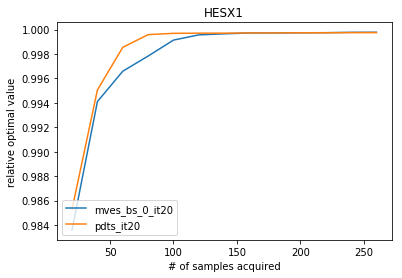

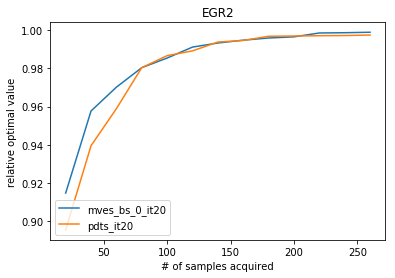

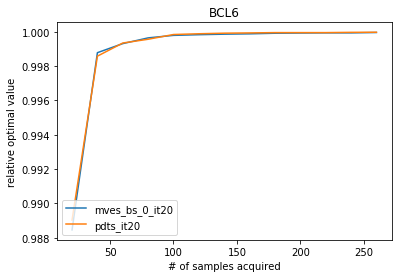

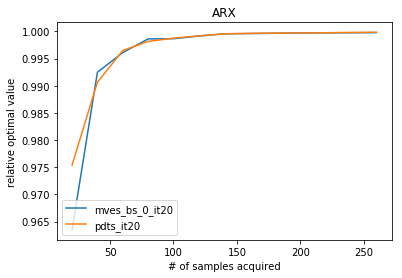

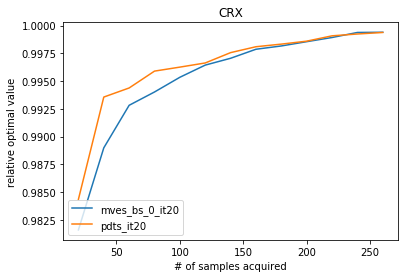

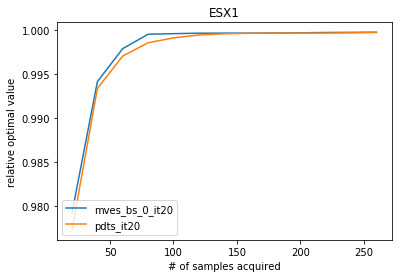

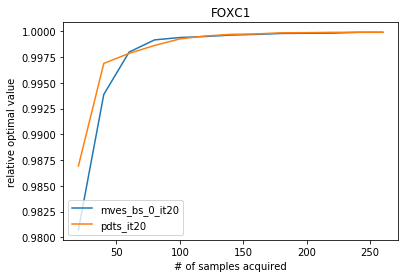

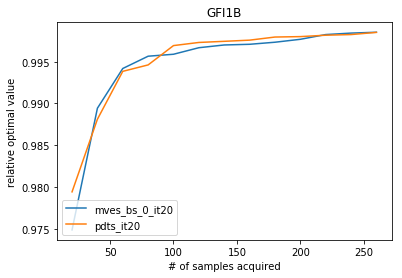

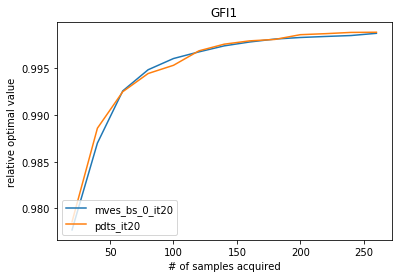

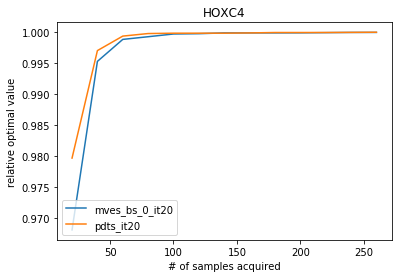

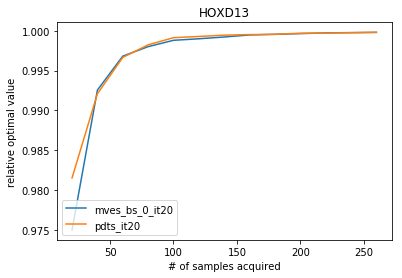

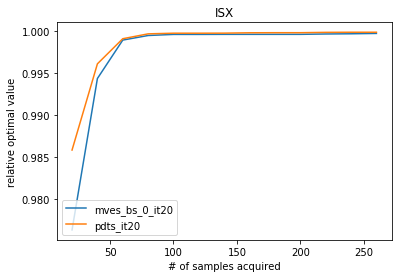

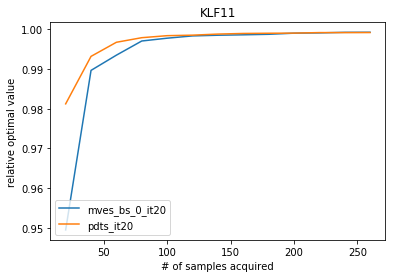

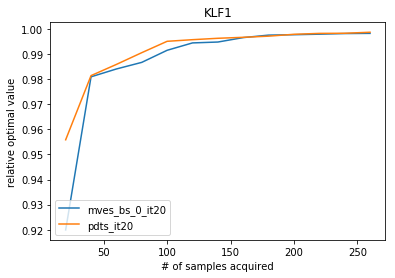

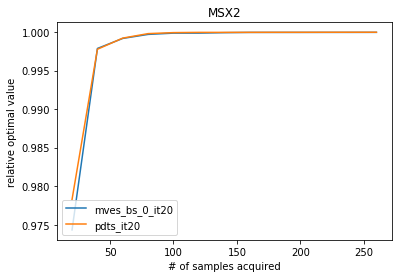

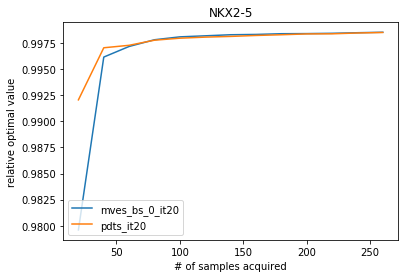

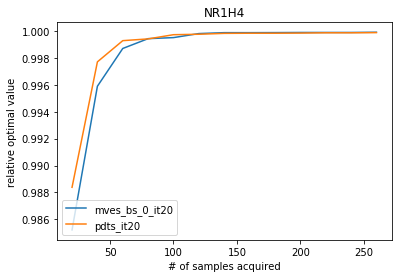

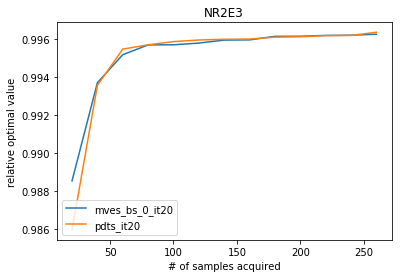

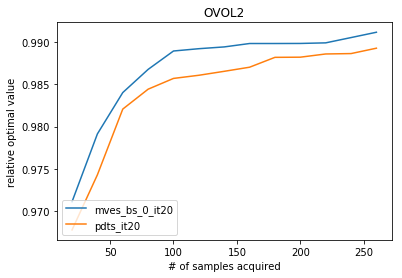

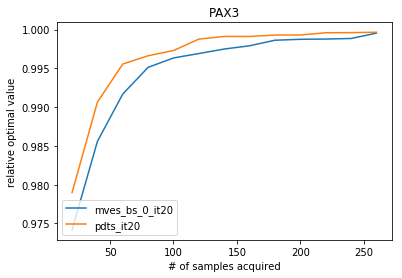

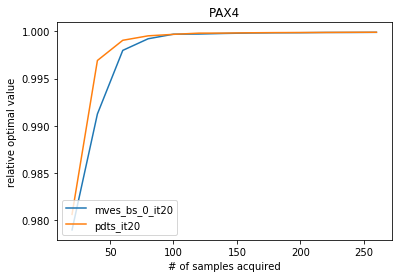

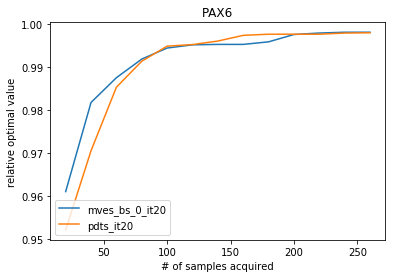

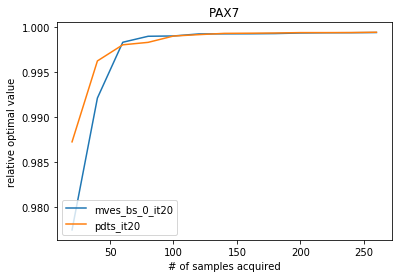

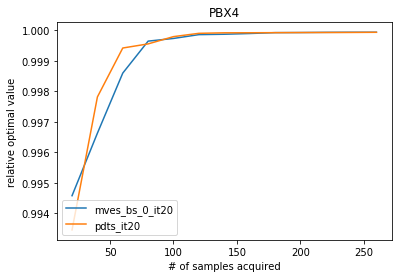

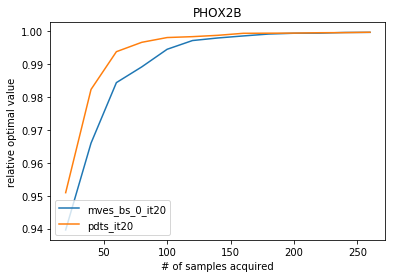

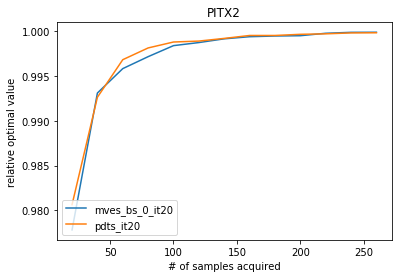

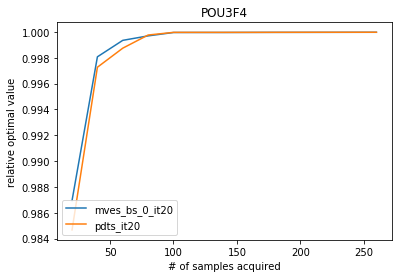

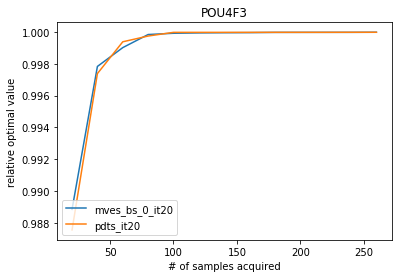

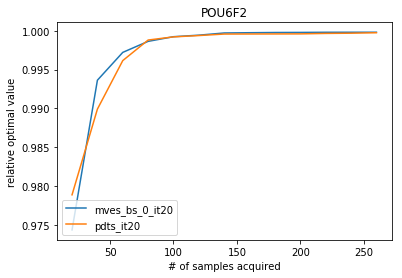

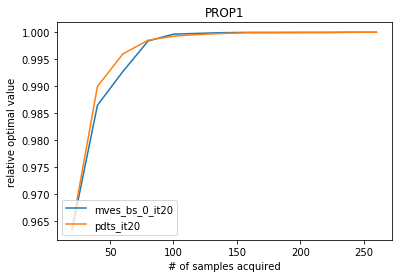

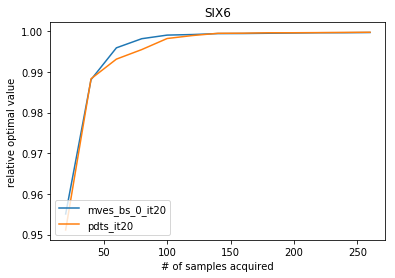

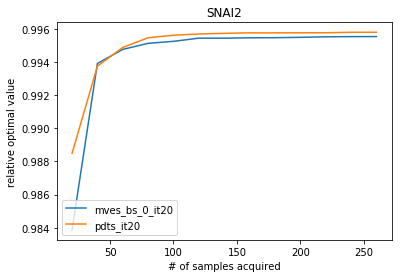

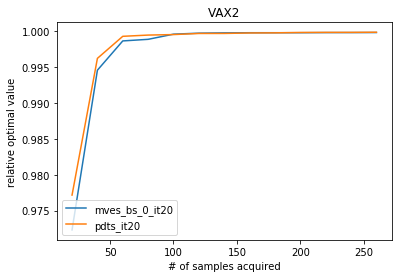

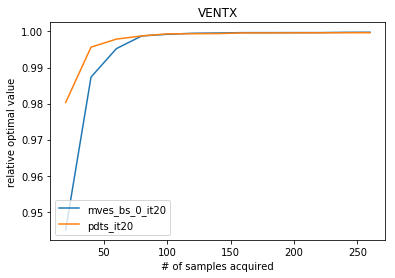

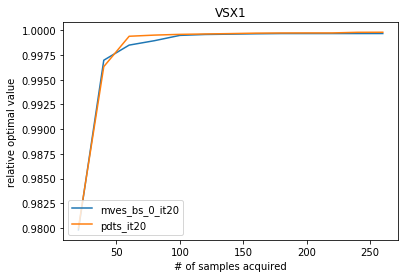

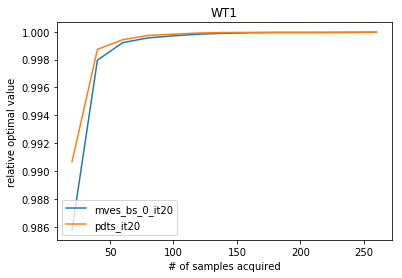

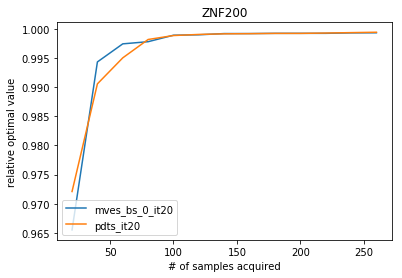

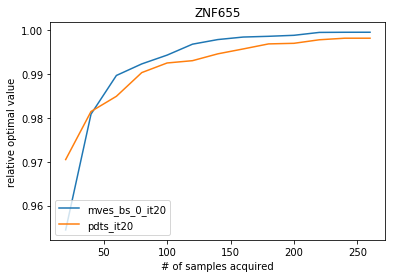

In [360]:
cs.plot_data_vs_ack_iter(
    20,
    filenames,
    'avg_seeds',
    'relative optimal value',
    #ack_regret_fn,
    ack_rel_opt_val_data_extractor,
    14,
    arrs,
    to_eval,
    legend_loc=3,
    figsize=(6, 4),
    num_samples_label=True,
    save_path='/cluster/sj1/bb_opt/plots',
)

In [ ]:
cs.plot_data_vs_ack_iter(
    10,
    filenames[0:15],
    'avg_seeds',
    'gamma',
    lambda x : x['best_gamma'] if x['best_gamma'] is not None else 0,
    30,
    arrs,
    to_eval,
    legend_loc=3,
)

In [ ]:
ack_iter = 0
for filename in filenames:
    print(filename)
    for batch_size in batches:
        for experiment in to_eval:
            best_value = 0
            num_used = 0
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                best_value += stats[filename][batch_size][ack_iter]['logging'][9].item()
            if num_used > 0:
                best_value = best_value/num_used
                print(arrs[experiment][1] + ":", best_value, ";", str(num_used), "samples")

In [ ]:
test_properties = [
    'test_log_prob',
    'test_mse',
    'test_kt_corr',
    'test_std_list',
    'test_mse_std_corr'
]

avg = True

for prop in test_properties[1:2]:
    for filename in filenames[0:1]:
        print(filename)
        for batch_size in batches:
            for experiment in arrs:
                plt.figure(figsize=(15, 4))
                plt.subplot(121)
                prop_list = np.array([0.]*num_acks)
                num_used = 0
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) < num_acks:
                        continue
                    num_used += 1
                    if avg:
                        prop_list += np.array([stats[filename][batch_size][i][prop][0].item() for i in range(num_acks)])
                    else:
                        prop_list = [stats[filename][batch_size][i][prop][0].item() for i in range(num_acks)]
                    if not avg:
                        plt.plot(prop_list)
                if avg:
                    plt.plot(prop_list/num_used)
                plt.title(arrs[experiment][1] + "; " + prop + "; all")
                plt.subplot(122)
                prop_list = np.array([0.]*num_acks)
                num_used = 0
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) < num_acks:
                        continue
                    num_used += 1
                    if avg:
                        prop_list += np.array([stats[filename][batch_size][i][prop][1].item() for i in range(num_acks)])
                    else:
                        prop_list = [stats[filename][batch_size][i][prop][1].item() for i in range(num_acks)]
                    if not avg:
                        plt.plot(prop_list)
                if avg:
                    plt.plot(prop_list/num_used)
                plt.title(arrs[experiment][1] + "; " + prop + "; top 10%")

In [ ]:
ack_iter = 0
for filename in filenames[2:3]:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            plt.figure(figsize=(15, 4))
            for stats in arrs[experiment][0]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                prop_list = stats[filename][batch_size][ack_iter]['logging'][-1].numpy()
                plt.plot(prop_list)
                plt.title(arrs[experiment][1] + "; " + str(ack_iter))

In [28]:
to_eval = [
    #'top_val_none_ucb_g0.0_',
    'top_val_none_ucb_maxstd_g01051020_',
    'top_val_none_ucb_g0.0_200epochs_last_',
    #'top_val_none_ucb_maxvar_g01051020_',
]

ARX_L343Q_R1_8mers.txt
BCL6_H676Y_R1_8mers.txt
CRX_E80A_R1_8mers.txt


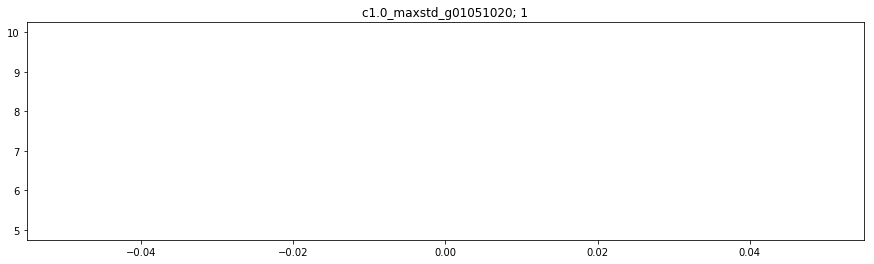

<Figure size 1080x288 with 0 Axes>

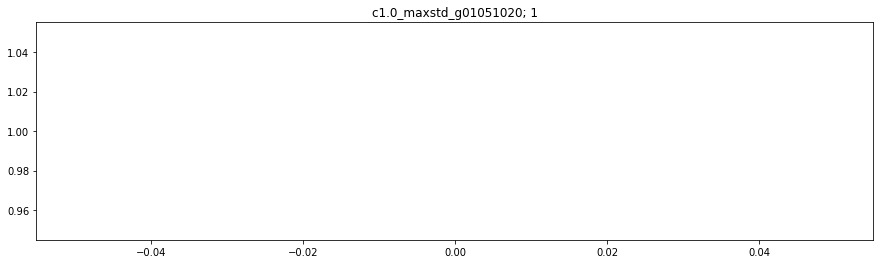

<Figure size 1080x288 with 0 Axes>

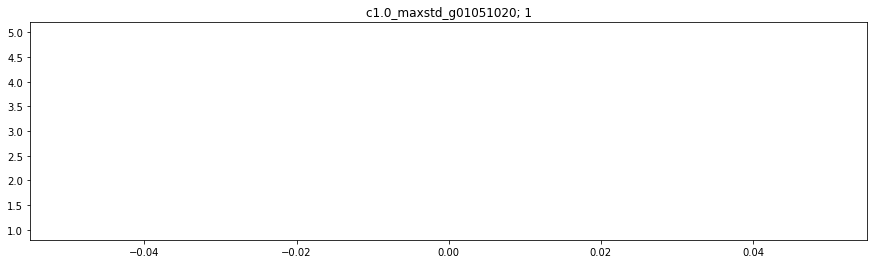

<Figure size 1080x288 with 0 Axes>

In [43]:
ack_iter = 1
for filename in filenames[:3]:
    print(filename)
    for batch_size in batches:
        for experiment in to_eval:
            plt.figure(figsize=(15, 4))
            for stats in arrs[experiment][0]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                #prop_list = stats[filename][batch_size][ack_iter]['logging'][5].numpy()
                prop_list = stats[filename][batch_size][ack_iter]['best_gamma']
                plt.plot(prop_list)
                plt.title(arrs[experiment][1] + "; " + str(ack_iter))

In [31]:
test_properties = [
    'test_log_prob',
    'test_mse',
    'test_kt_corr',
    'test_std_list',
    'test_mse_std_corr'
]

ack_iter = -1
for filename in filenames:
    print(filename)
    for batch_size in [10]:
        for experiment in to_eval:
            m = None
            num_used = 0
            for stats in arrs[experiment][0]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                #m += stats[filename][batch_size][ack_iter]['test_std_list'][0].item()
                m2 = np.array([
                    np.exp(stats[filename][batch_size][ack_iter]['ack_labels'].max()-tf_max[filename]),
                    #stats[filename][batch_size][ack_iter]['test_std_list'][0].item(),
                    #stats[filename][batch_size][ack_iter]['test_std_list'][1].item(),
                    #stats[filename][batch_size][ack_iter]['test_std_list'][2].item()
                ])
                if m is None:
                    m = m2
                else:
                    m += m2
            if num_used > 0:
                print(arrs[experiment][1], ":", m/num_used, ";", num_used, "samples")

ARX_L343Q_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.9703925] ; 10 samples
c1.0_g0.0_200epochs_last : [0.9711157] ; 10 samples
BCL6_H676Y_R1_8mers.txt
c1.0_maxstd_g01051020 : [1.] ; 10 samples
c1.0_g0.0_200epochs_last : [0.9940775] ; 10 samples
CRX_E80A_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.5894803] ; 10 samples
c1.0_g0.0_200epochs_last : [0.9260233] ; 10 samples
EGR2_D383Y_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.36053544] ; 10 samples
c1.0_g0.0_200epochs_last : [0.9321119] ; 10 samples
ESX1_K193R_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.9648775] ; 10 samples
c1.0_g0.0_200epochs_last : [0.92595255] ; 10 samples
FOXC1_F112S_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.9920701] ; 10 samples
c1.0_g0.0_200epochs_last : [0.9971632] ; 10 samples
GFI1B_A204T_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.814147] ; 10 samples
c1.0_g0.0_200epochs_last : [0.93335307] ; 10 samples
GFI1_L400F_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.6895327] ; 10 samples
c1.0_g0.0_200epochs_last : [0.7775618] ; 10 samples
HESX1_

In [43]:
num_labels = 32897

In [79]:
to_eval = [
    'take_log_none_ucb_c1.0_g0.0_',
    #'take_log_none_ucb_c2.0_g0.0_',
    'take_log_none_ucb_c1.0_g5.0_',
    'take_log_none_ucb_c1.0_g10.0_',
    'take_log_none_ucb_c1.0_g20.0_',
]

to_eval = [
    'take_log_none_ucb_num_acks_30_c1.0_g0.0_',
    'take_log_none_ucb_num_acks_30_c1.0_g5.0_',
    'take_log_none_ucb_num_acks_30_c1.0_g10.0_',
]

In [81]:
num_acks = 30

In [240]:
to_eval = {
    'take_log_none_ucb_num_acks_30_c1.0_g0.0_': 'Normal',
    'take_log_none_ucb_num_acks_30_c1.0_maxvar_' : 'MOD',
    'take_log_none_ucb_num_acks_30_c1.0_mincorr_' : 'MOD2',
}

to_eval = {
    'take_log_none_ucb_ntest' : 'Normal',
}

In [52]:
to_eval = [
    #'top_val_none_ucb_g0.0_',
    'top_val_none_ucb_g0.0_modelseed',
    #'top_val_none_ucb_maxstd_g01051020_',
    #'top_val_none_ucb_g0.0_200epochs_last_',
    #'top_val_none_ucb_maxvar_g01051020_',
]

/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


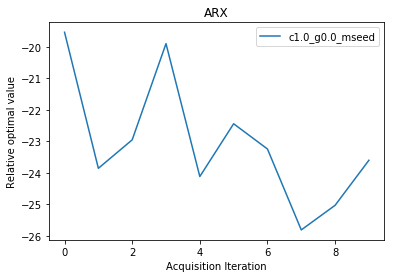

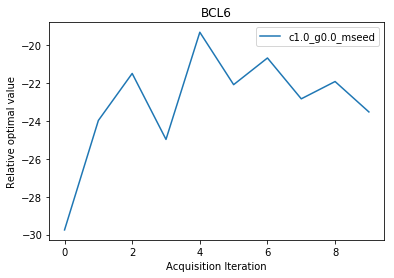

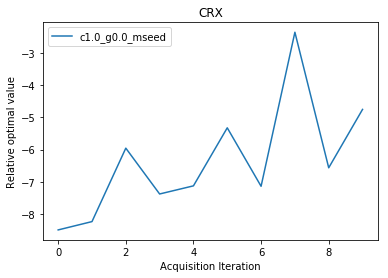

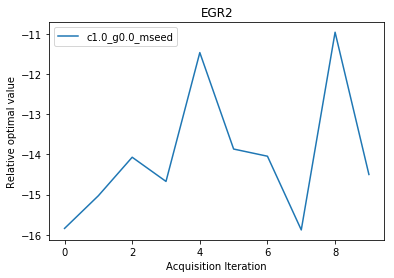

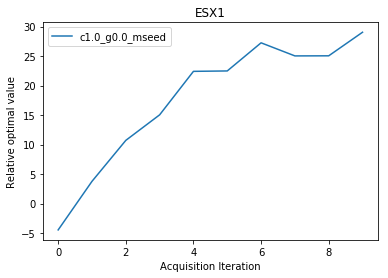

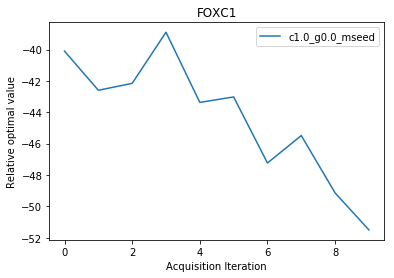

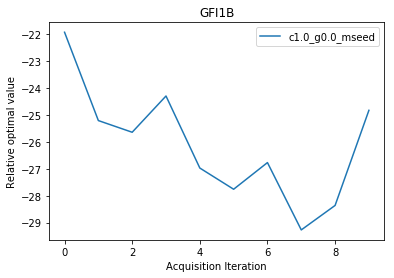

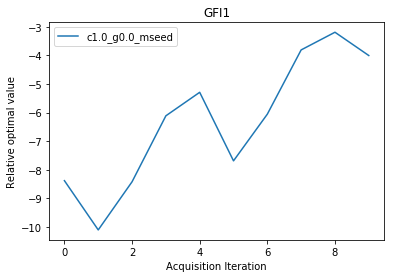

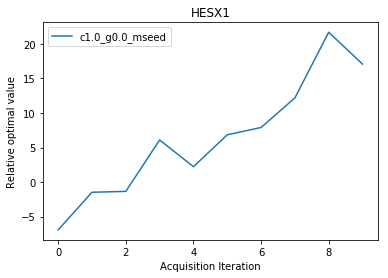

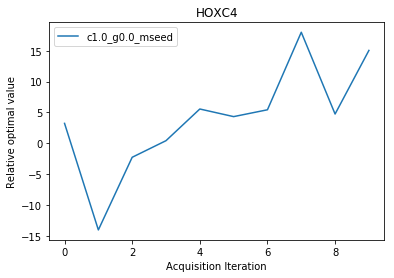

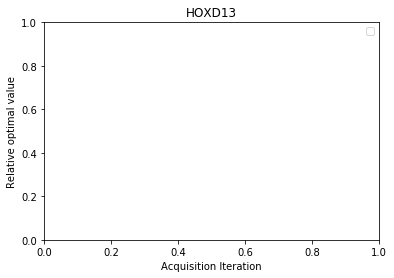

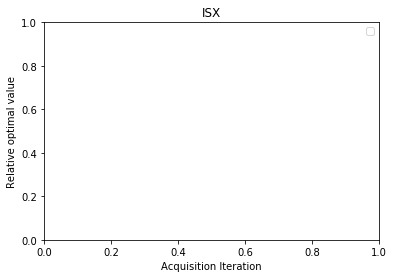

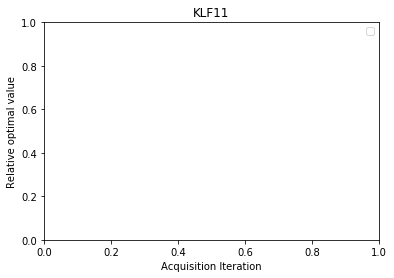

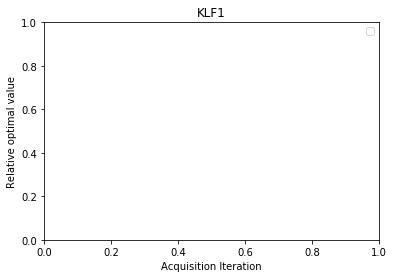

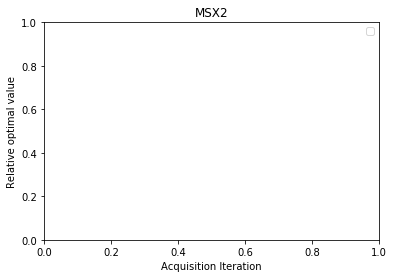

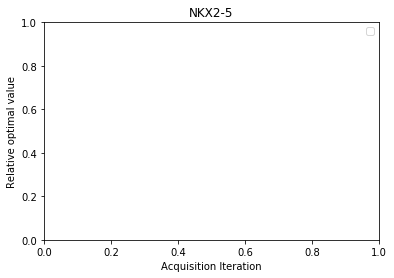

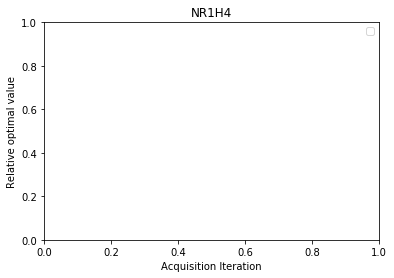

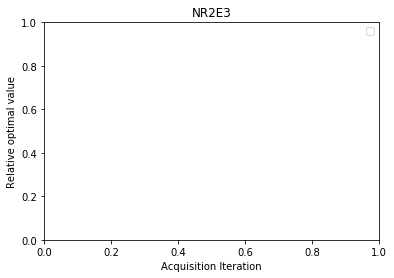

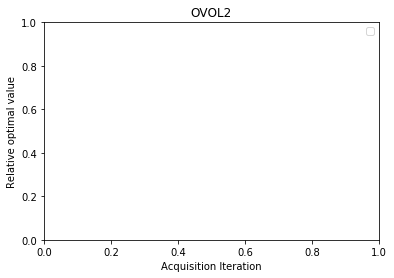

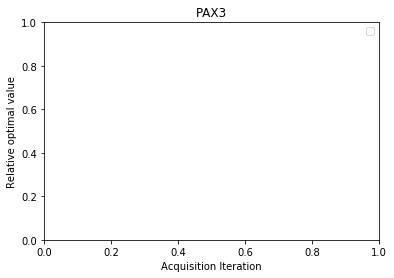

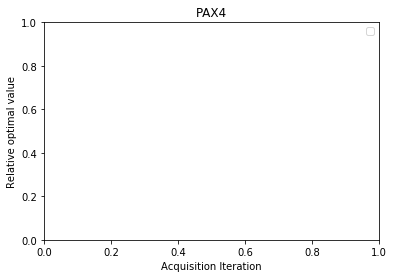

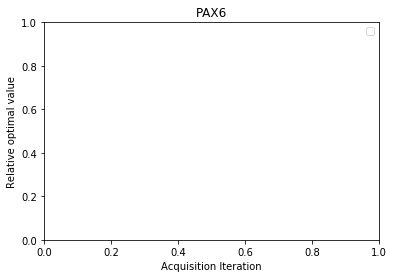

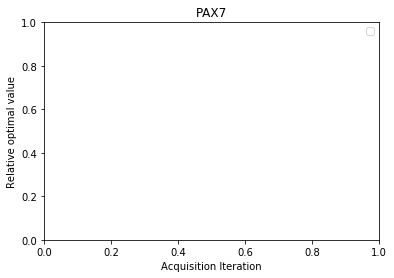

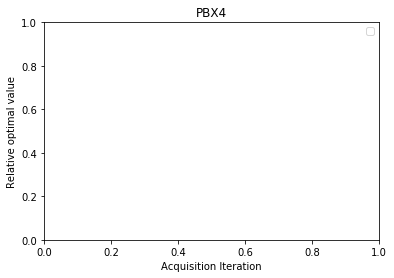

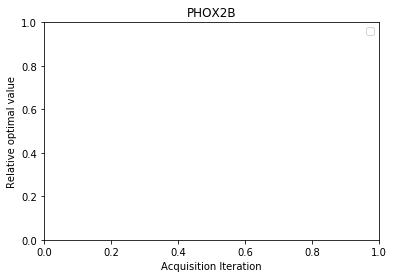

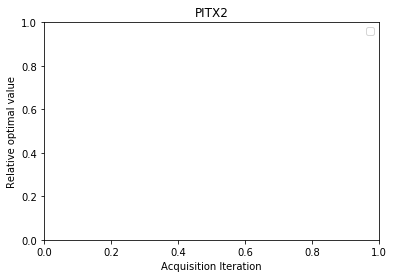

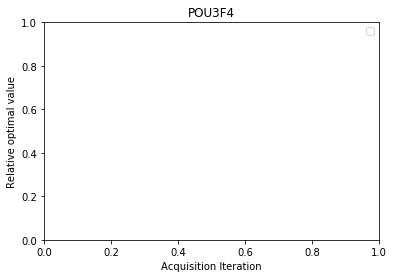

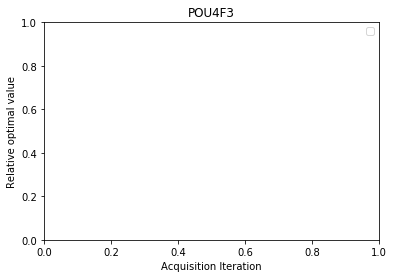

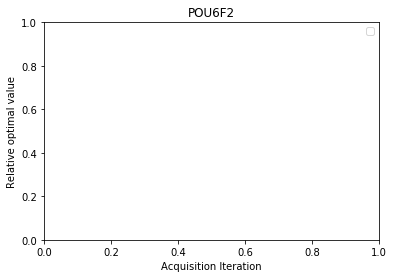

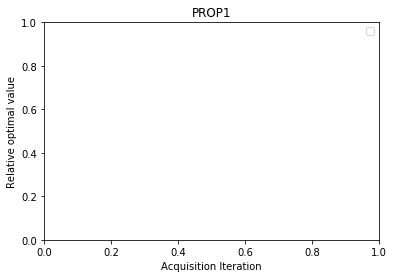

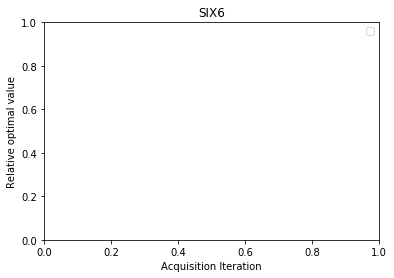

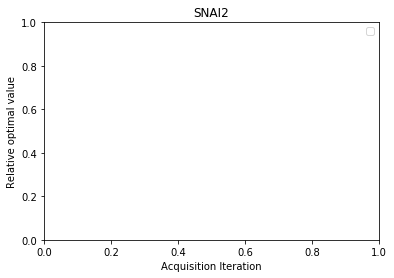

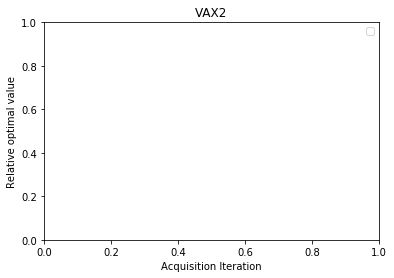

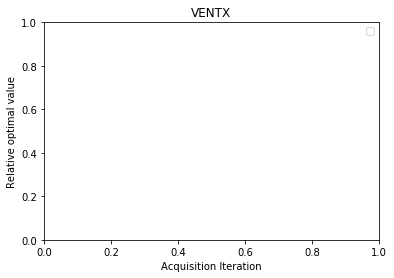

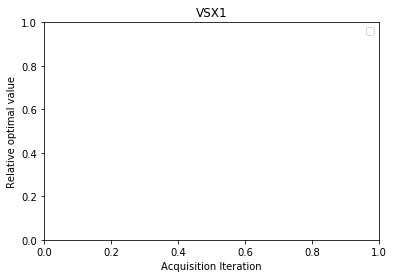

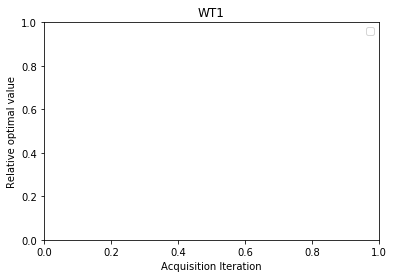

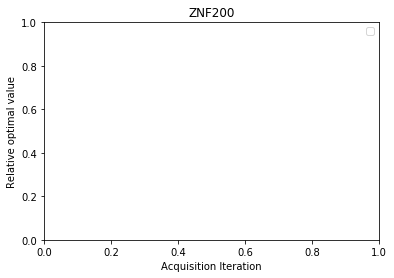

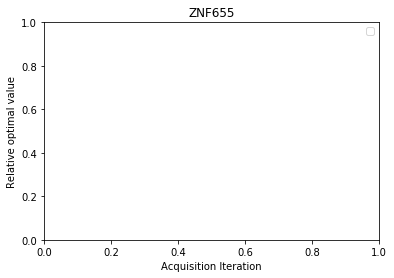

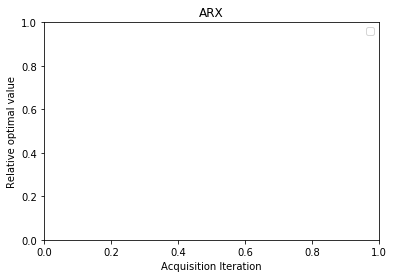

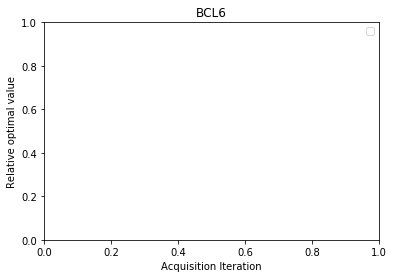

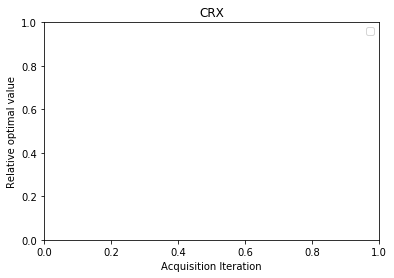

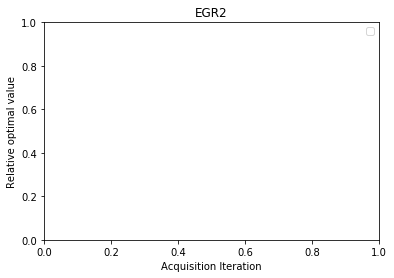

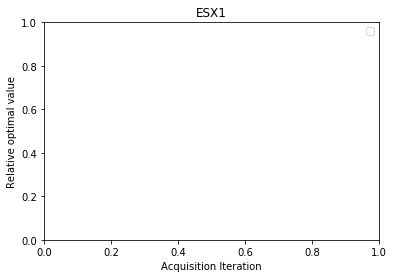

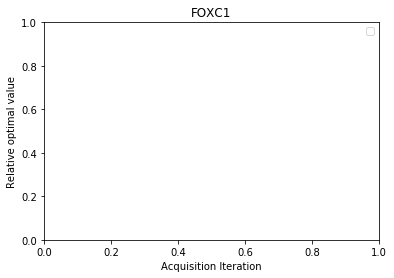

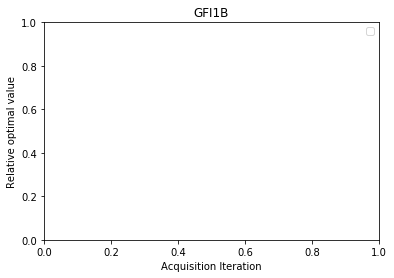

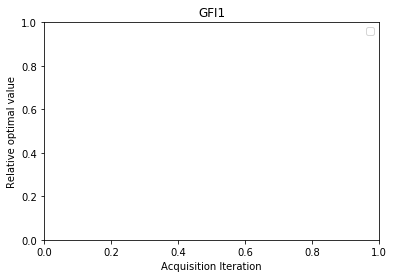

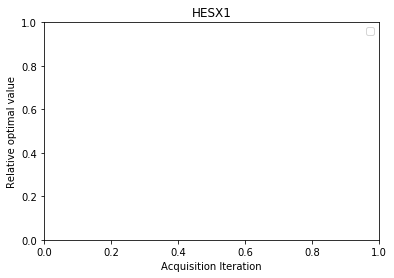

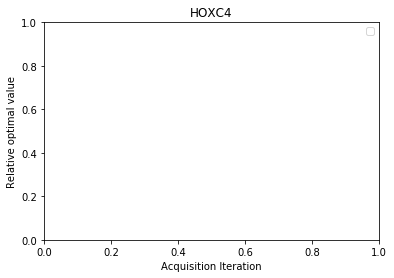

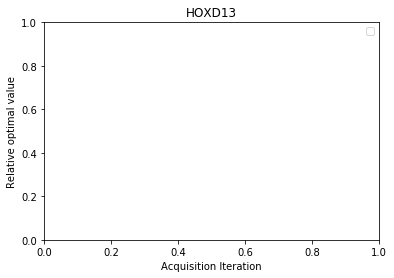

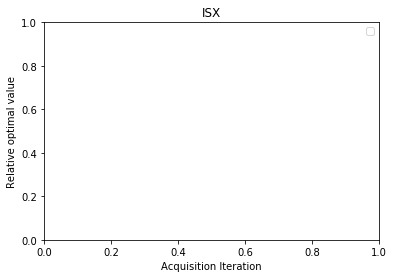

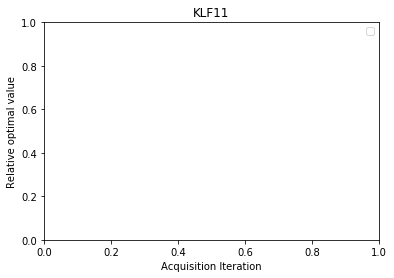

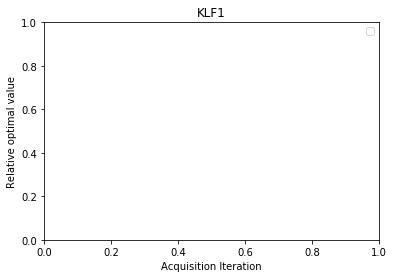

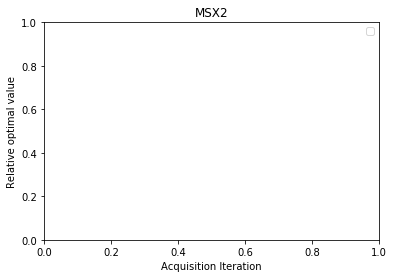

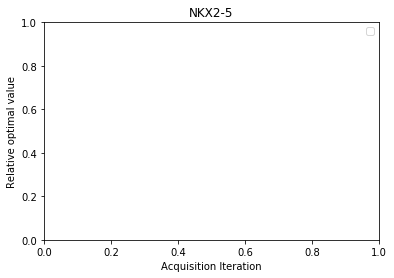

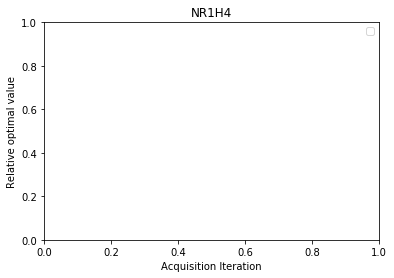

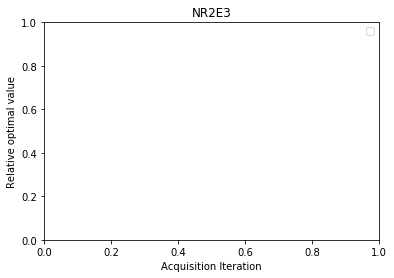

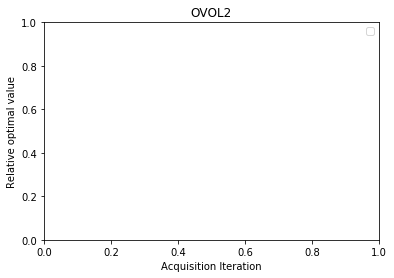

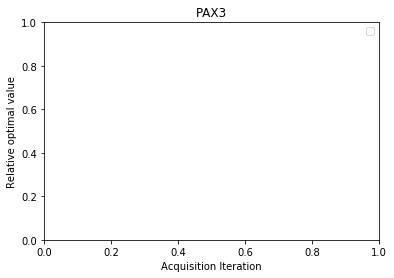

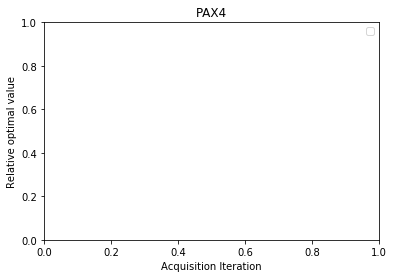

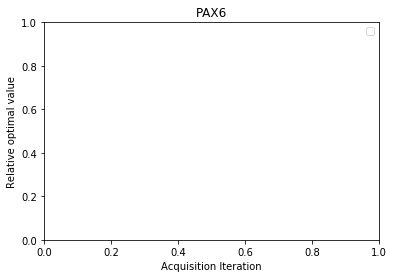

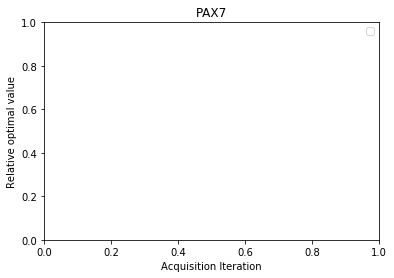

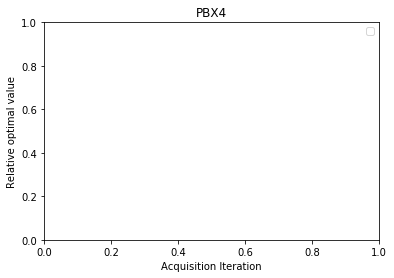

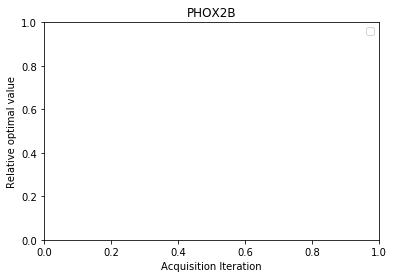

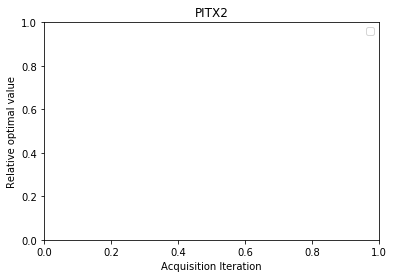

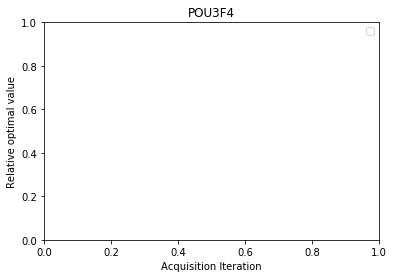

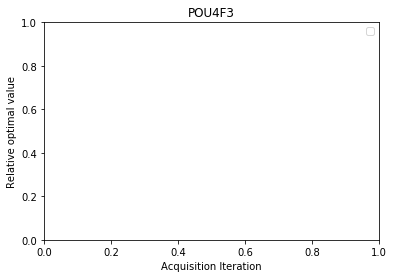

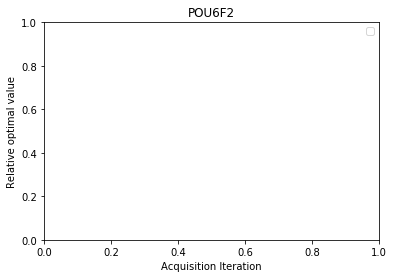

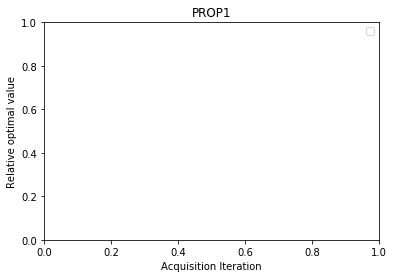

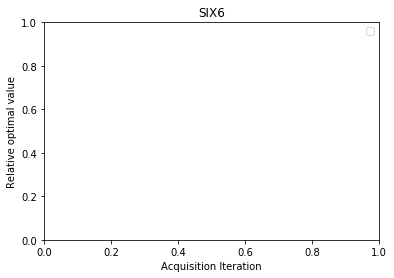

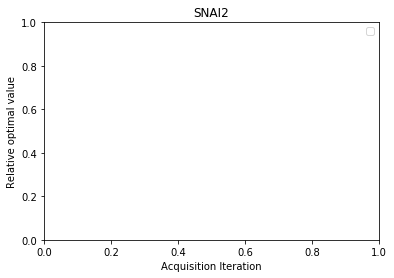

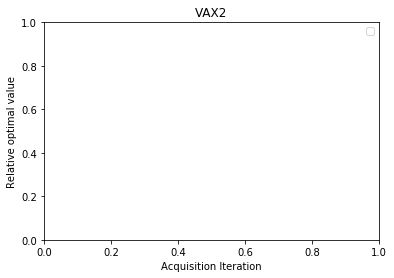

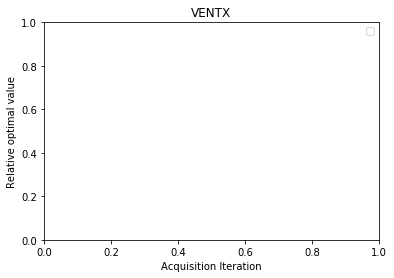

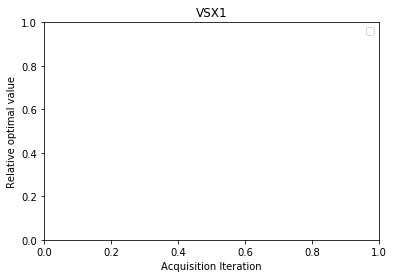

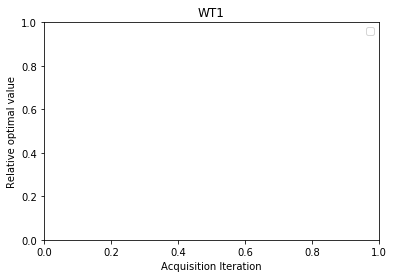

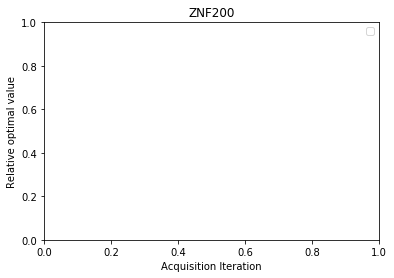

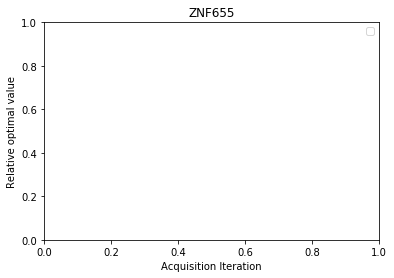

In [53]:
avg = True
num_acks = 10

for batch_size in batches:
    for filename in filenames:
        if avg:
            plt.figure(figsize=(6, 4))
            legend = []
        for experiment in to_eval:
            if not avg:
                plt.figure(figsize=(15, 4))
            prop_list = []
            num_used = 0
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                if len(stats[filename][batch_size]) < num_acks:
                    continue
                num_used += 1
                if avg:
                    #prop_list += [np.array([np.exp(stats[filename][batch_size][ack_iter]['ack_labels'].max()-tf_max[filename]) for ack_iter in range(num_acks)])]
                    #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['idx_frac'][0]) for ack_iter in range(num_acks)])]
                    #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['corr_stats'][0][-4]) for ack_iter in range(num_acks)])]
                    prop_list += [np.array([(stats[filename][batch_size][ack_iter]['logging'][0][8]) for ack_iter in range(num_acks)])]
                else:
                    prop_list = [(stats[filename][batch_size][ack_iter]['ack_labels'].max()) for ack_iter in range(num_acks)]
                    prop_list = [np.array([(stats[filename][batch_size][ack_iter]['corr_stats'][0][-4]) for ack_iter in range(num_acks)])]
                if not avg:
                    plt.plot(prop_list)
            if avg and num_used > 0:
                prop_list = np.stack(prop_list, axis=0)
                plt.plot(np.median(prop_list, axis=0))
                legend += [arrs[experiment][1]]
            elif not avg:
                plt.title(arrs[experiment][1] + "; " + str(batch_size) + "; all")
        if avg:
            plt.legend(legend)
            plt.xlabel('Acquisition Iteration')
            plt.ylabel('Relative optimal value')
            #plt.title(filename + "; " + str(batch_size) + "; all")
            plt.title(filename.split("_")[0])

/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


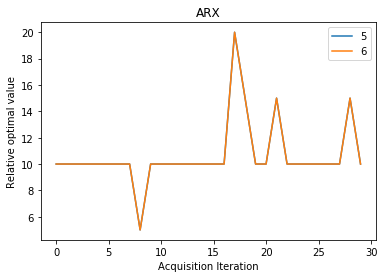

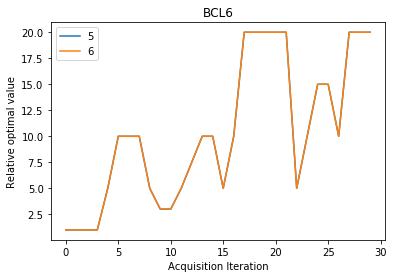

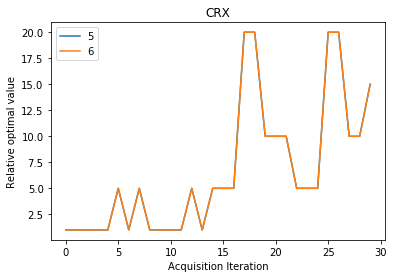

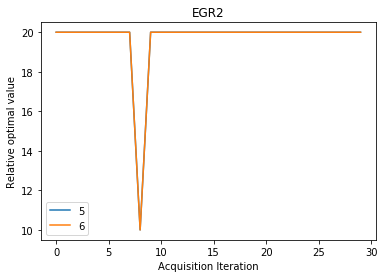

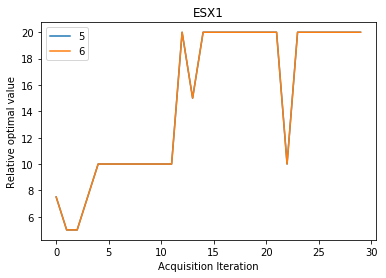

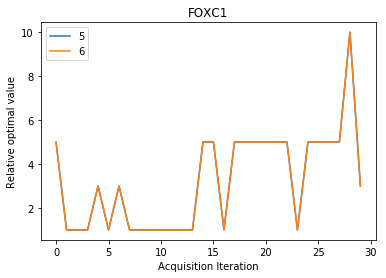

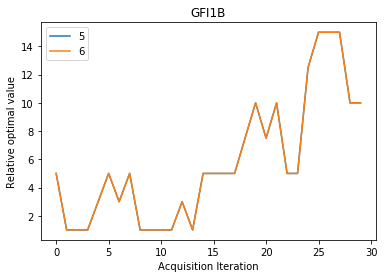

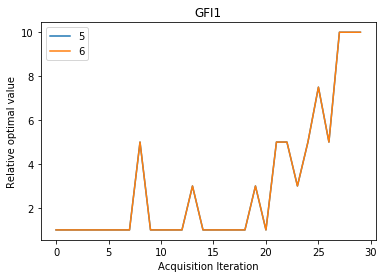

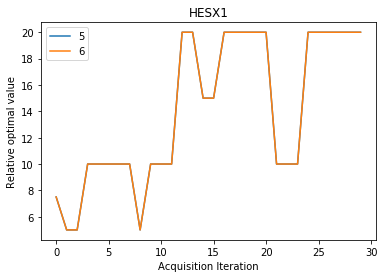

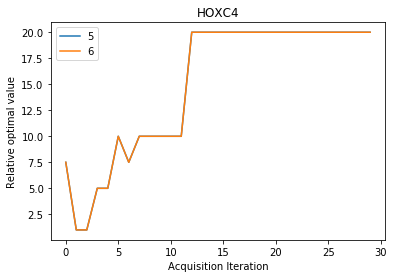

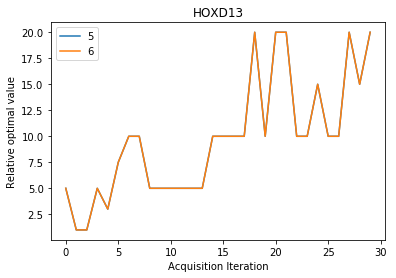

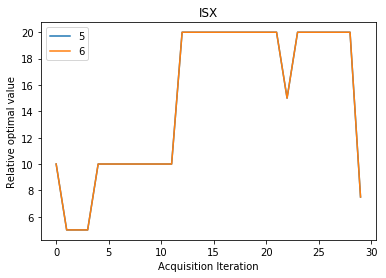

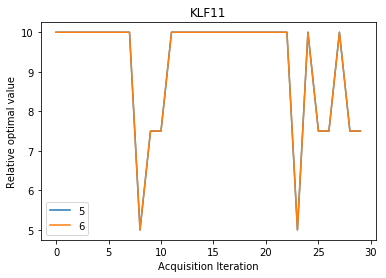

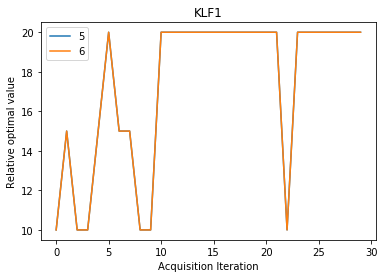

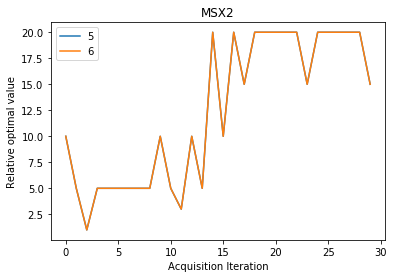

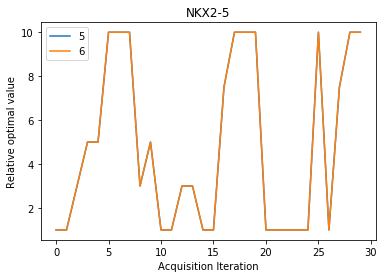

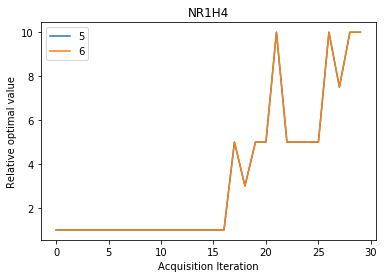

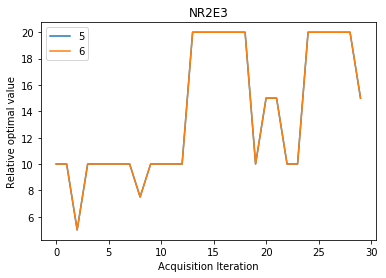

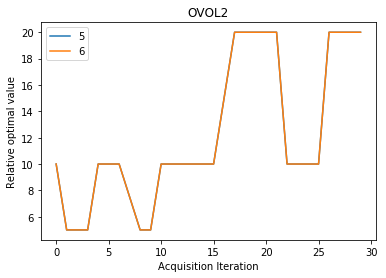

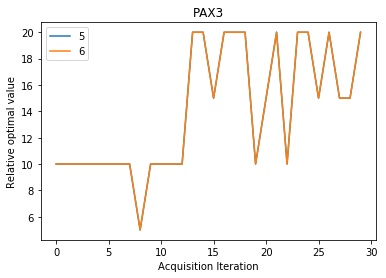

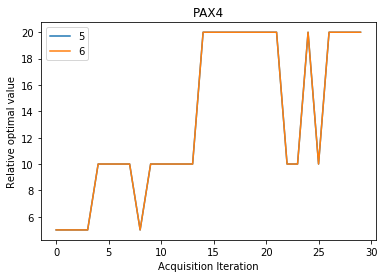

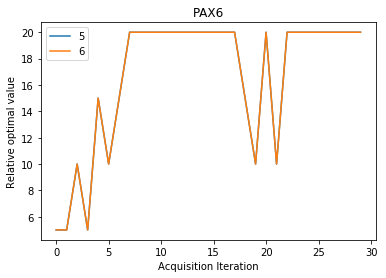

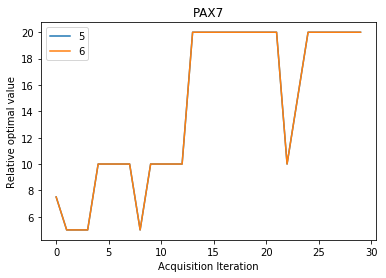

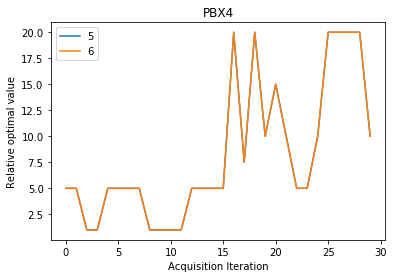

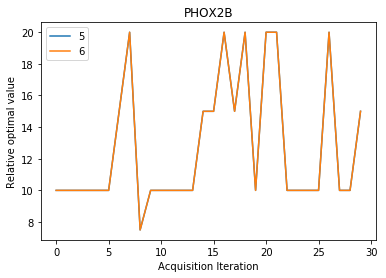

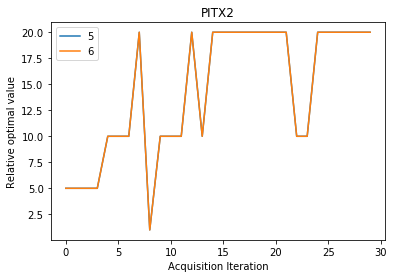

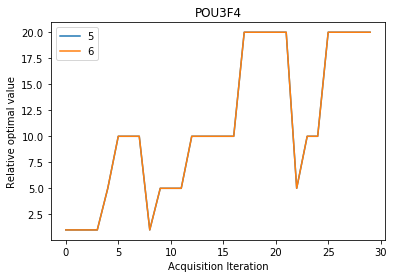

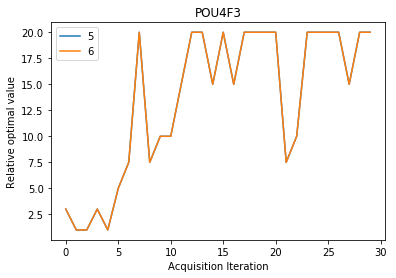

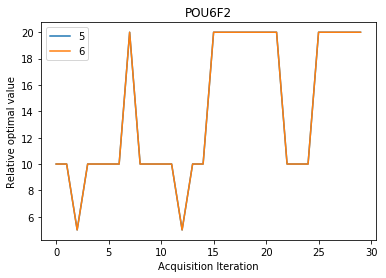

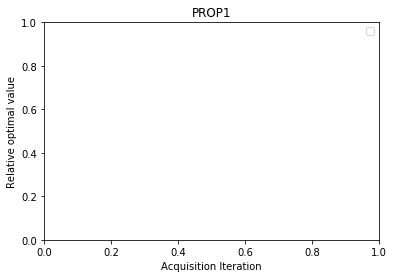

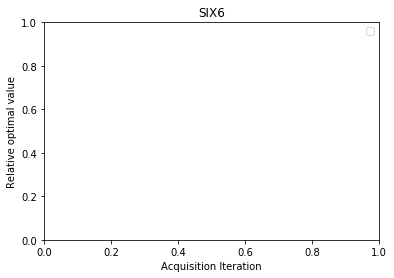

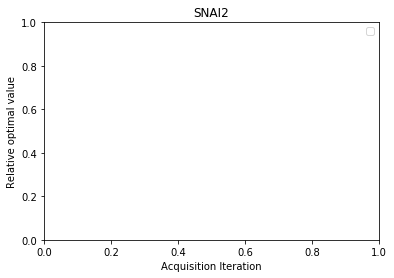

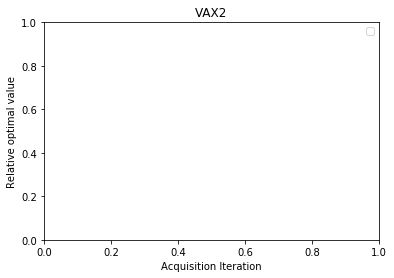

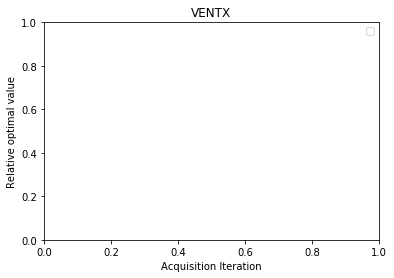

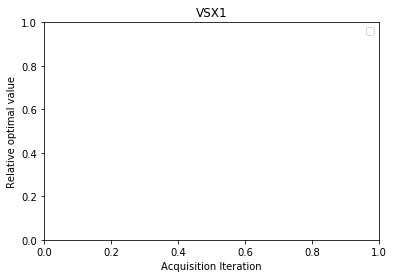

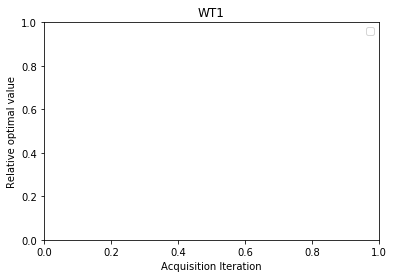

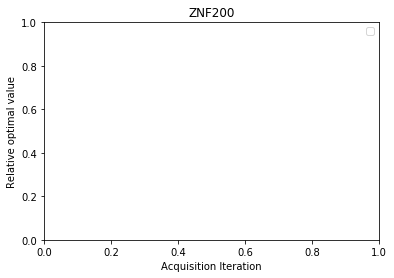

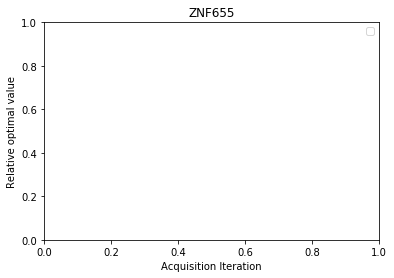

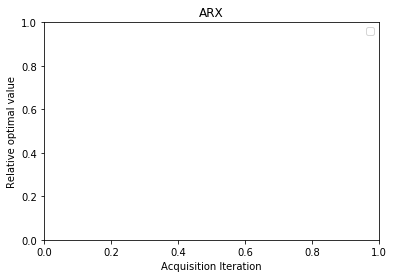

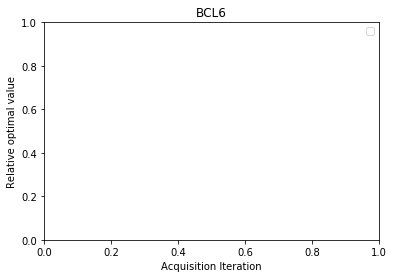

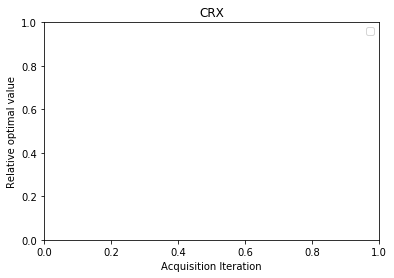

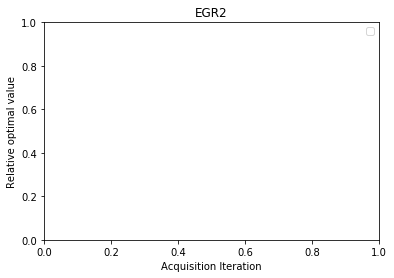

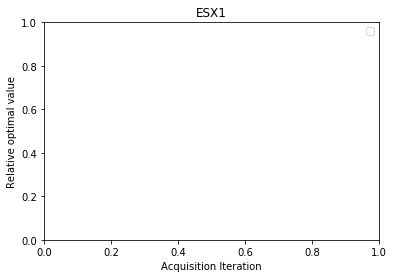

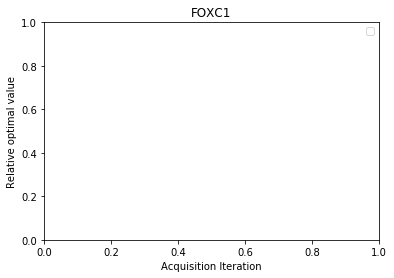

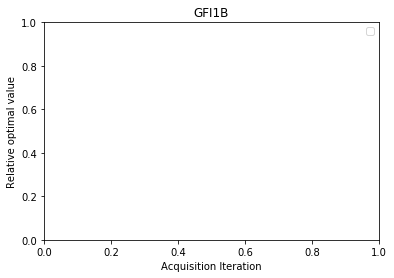

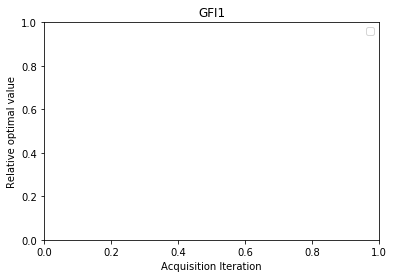

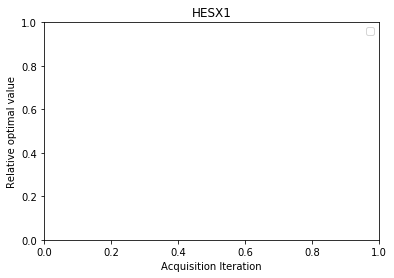

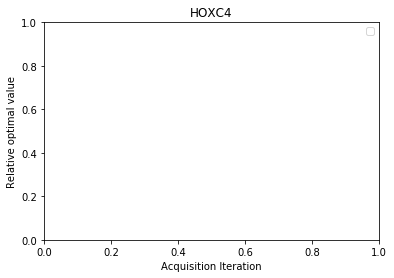

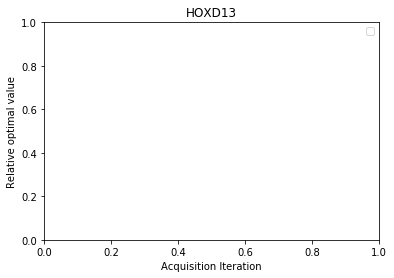

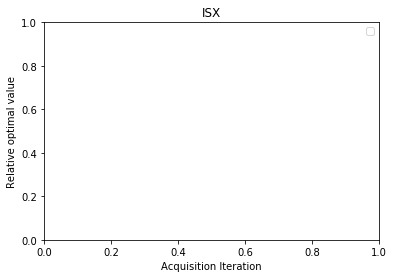

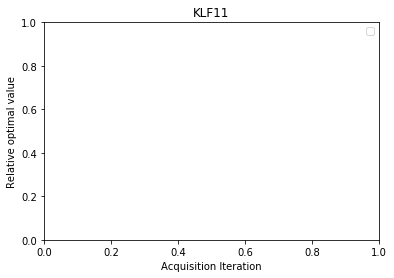

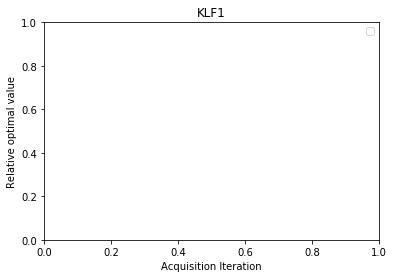

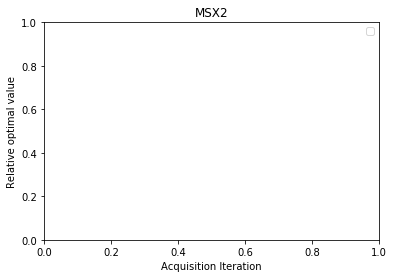

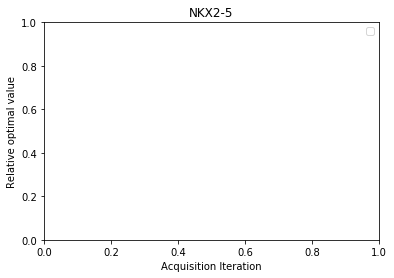

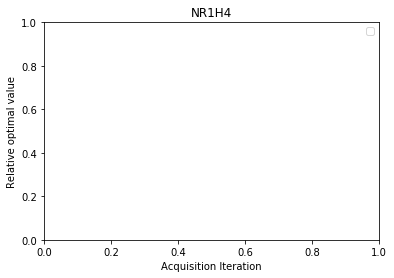

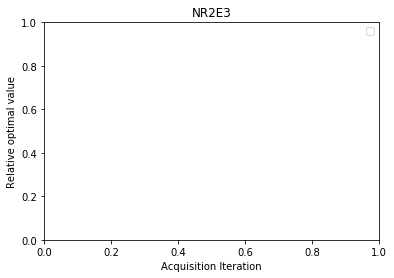

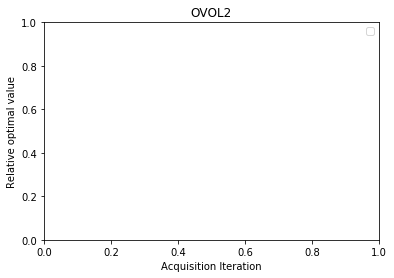

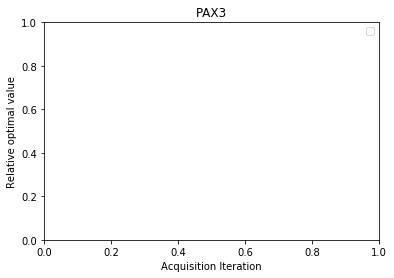

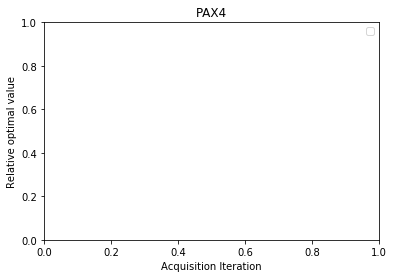

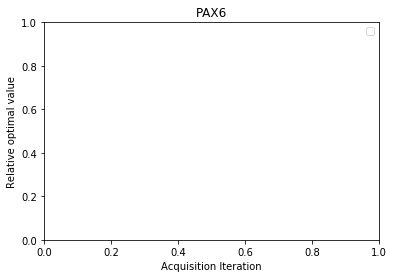

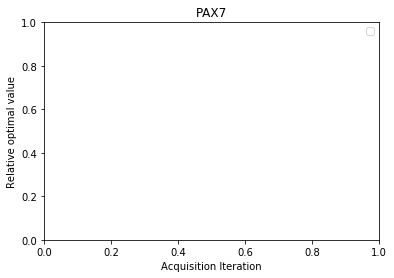

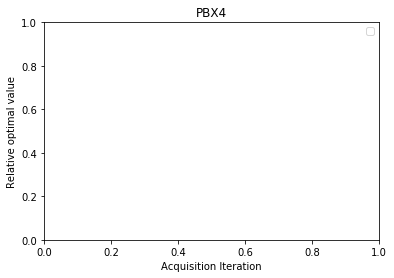

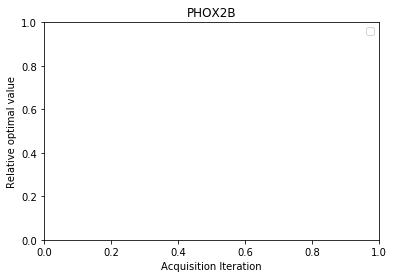

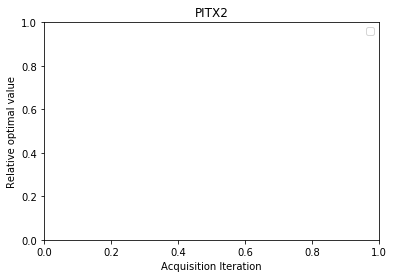

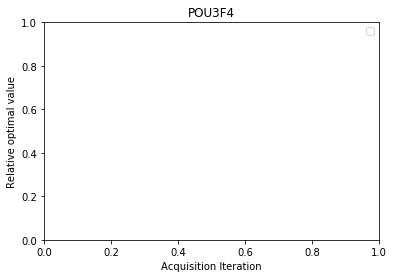

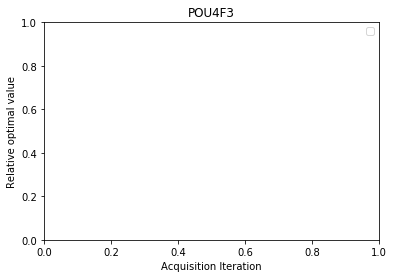

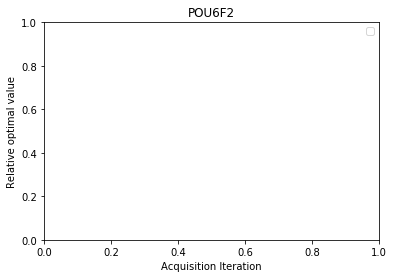

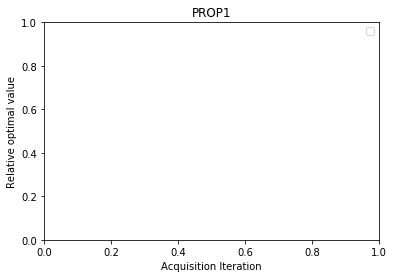

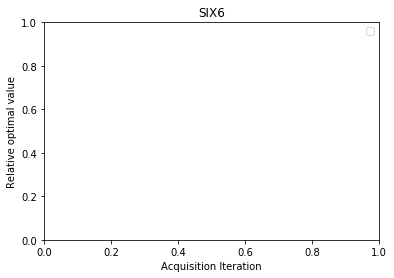

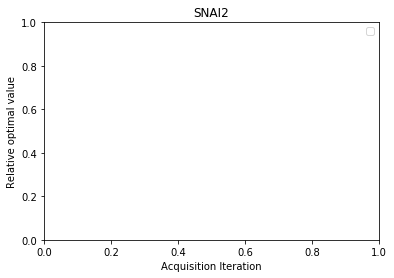

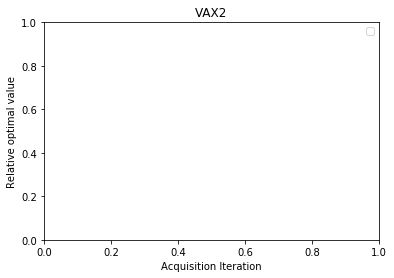

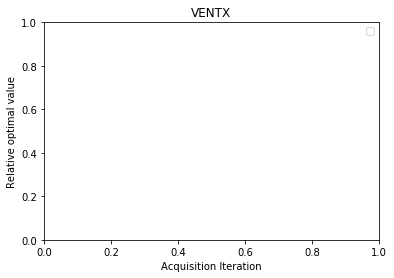

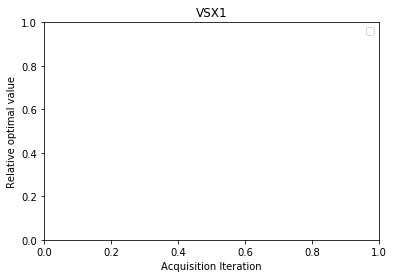

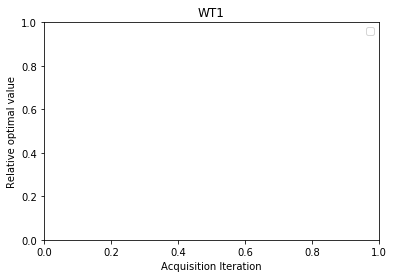

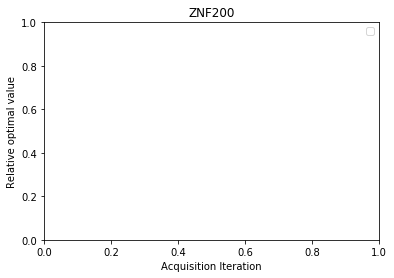

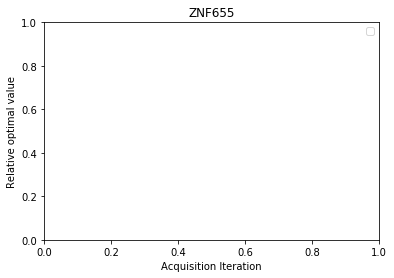

In [44]:
avg = True

for batch_size in batches:
    for filename in filenames:
        if avg:
            plt.figure(figsize=(6, 4))
            legend = []
        for experiment in to_eval:
            if not avg:
                plt.figure(figsize=(15, 4))
                
            for prop_i in [5, 6]:
                prop_list = []
                num_used = 0
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) < num_acks:
                        continue
                    num_used += 1
                    if avg:
                        #prop_list += [np.array([np.exp(stats[filename][batch_size][ack_iter]['ack_labels'].max()-tf_max[filename]) for ack_iter in range(num_acks)])]
                        #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['idx_frac'][0]) for ack_iter in range(num_acks)])]
                        #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['corr_stats'][1][prop_i].item()) for ack_iter in range(num_acks)])]
                        prop_list += [np.array([(stats[filename][batch_size][ack_iter]['best_gamma']) for ack_iter in range(num_acks)])]
                    else:
                        prop_list = [(stats[filename][batch_size][ack_iter]['ack_labels'].max()) for ack_iter in range(num_acks)]
                        prop_list = [np.array([(stats[filename][batch_size][ack_iter]['corr_stats'][1][prop_i].item()) for ack_iter in range(num_acks)])]
                    if not avg:
                        plt.plot(prop_list)
                if avg and num_used > 0:
                    prop_list = np.stack(prop_list, axis=0)
                    plt.plot(np.median(prop_list, axis=0))
                    legend += [str(prop_i)]
                elif not avg:
                    plt.title(arrs[experiment][1] + "; " + str(batch_size) + "; all")
        if avg:
            plt.legend(legend)
            plt.xlabel('Acquisition Iteration')
            plt.ylabel('Relative optimal value')
            #plt.title(filename + "; " + str(batch_size) + "; all")
            plt.title(filename.split("_")[0])

Text(0, 0.5, 'Relative optimal value')

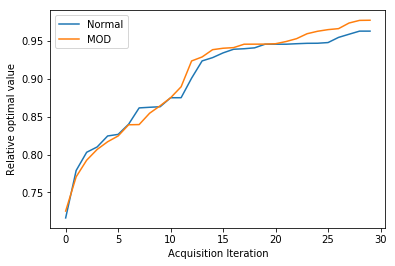

In [178]:
avg = True

plt.figure(figsize=(6, 4))
legend = []
for experiment in to_eval:
    prop_list = []
    for batch_size in [10]:
        for filename in filenames:
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                if len(stats[filename][batch_size]) < num_acks:
                    continue
                prop_list += [np.array([np.exp(stats[filename][batch_size][ack_iter]['ack_labels'].max()-tf_max[filename]) for ack_iter in range(num_acks)])]
                #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['idx_frac'][0]) for ack_iter in range(num_acks)])]
    prop_list = np.stack(prop_list, axis=0)
    plt.plot(np.median(prop_list, axis=0))
    #legend += [arrs[experiment][1]]
    legend += [to_eval[experiment]]
plt.legend(legend)
plt.xlabel('Acquisition Iteration')
plt.ylabel('Relative optimal value')